# KM3 -  Modelowanie

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture


#random seed
np.random.seed(4324)

In [2]:
pd.set_option("display.max_columns", None)

### Wczytanie danych po feature engineeringu

In [3]:
#load different datasets
df1 = pd.read_csv('../Data/no_standarization.csv')
df2 = pd.read_csv('../Data/raw_normalized_scaled.csv')
df3 = pd.read_csv('../Data/log_normalized.csv')
df4 = pd.read_csv('../Data/log_scaled.csv')
df4_og = df4.copy()
df5 = pd.read_csv('../Data/removed_columns_no_standarization.csv')
df = pd.read_csv('../Data/our_data.csv')

In [4]:
df1.head()

runtime_minutes  director_name  movie_averageRating  movie_numerOfVotes  \
0            116.0          503.0                  6.3              5077.0   
1            114.0          299.0                  6.2             22262.0   
2            124.0           75.0                  7.1            145614.0   
3            125.0          350.0                  7.0            110757.0   
4             98.0          568.0                  6.1             41748.0   

   approval_Index  production_year     month_sin     month_cos  \
0        3.823171             1996  1.000000e-10  1.000000e-10   
1        4.434679             1993  8.660254e-01  5.000000e-01   
2        6.078636             2011  1.000000e-10  1.000000e+00   
3        5.850243             1977  1.000000e-10  1.000000e-10   
4        4.643223             2000  5.000000e-01  8.660254e-01   

   number_of_professions  age  Production budget $  Domestic gross $  \
0                      3    2           19000000.0         1353824.0   
1                      3    1           30000000.0        50081992.0   
2                      3    1           50000000.0        75624550.0   
3                      3    2           14000000.0        46800000.0   
4                      2    2            9500000.0        57176582.0   

   Worldwide gross $  Action  Adventure  Animation  Biography  Comedy  Crime  \
0          1353824.0       0          0          0          0       0      1   
1        140081992.0       0          0          0          0       0      0   
2        118729073.0       0          0          0          0       1      0   
3        185400000.0       1          1          0          0       0      0   
4         59675307.0       0          0          0          0       1      0   

   Documentary  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  \
0            0      1       0        0          0        0       0      1   
1            0      1       0        0          0        0       0      0   
2            0      1       1        0          0        0       0      0   
3            0      0       0        0          0        0       0      0   
4            0      0       0        0          0        0       0      0   

   Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  Western  \
0        0        0     0        0       0      0         0    0        0   
1        0        1     0        1       0      0         0    0        0   
2        0        0     0        0       0      0         0    0        0   
3        0        0     0        0       0      0         1    0        0   
4        0        0     0        0       0      0         0    0        0   

   cluster  
0        2  
1        4  
2        4  
3        4  
4        2

### Przypomnienie łokci z FE, aby określić liczbę klastrów

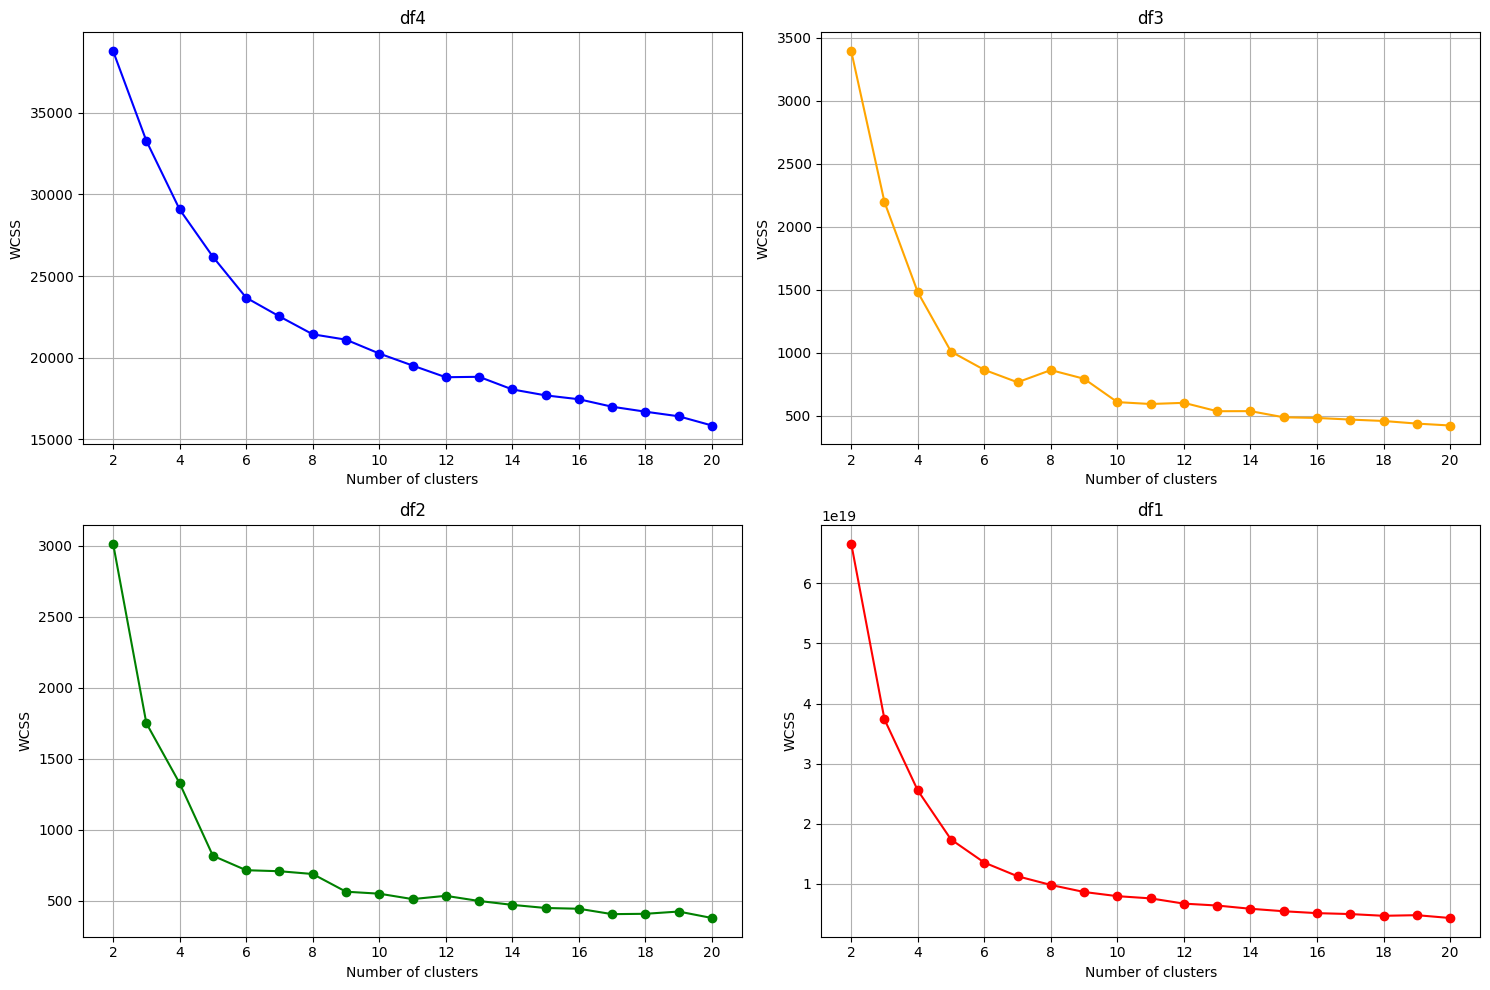

In [5]:

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Assuming v1, v2, v3, and v4 are your datasets
wcss_df4 = calculate_wcss(df4)
wcss_df3 = calculate_wcss(df3)
wcss_df2 = calculate_wcss(df2)
wcss_df1 = calculate_wcss(df1)


# Assuming wcss_v1, wcss_v2, wcss_v3, and wcss_v4 are defined lists
wcss_list = [wcss_df4, wcss_df3, wcss_df2, wcss_df1]
titles = ['df4', 'df3', 'df2', 'df1']
colors = ['b', 'orange', 'green', 'r']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (wcss, title, color) in enumerate(zip(wcss_list, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(range(2, 21), wcss, marker='o', color=color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('WCSS')
    axs[row, col].set_xticks(range(2, 22, 2))  # Set x-ticks every 2 units
    axs[row, col].grid()

plt.tight_layout()
plt.show()



zdecydowaliśmy się na 7 klastrów.

### Modelowanie

In [6]:
# wypróbuj różne metoday klasteryzacji dla N klastrów
def perform_clustering1(df4, N, df4_results,eps):
    # KMeans
    # how does KMeans work
    # 1. Randomly initialize the centroids
    # 2. Assign each data point to the closest centroid
    # 3. Recompute the centroids
    # 4. Repeat steps 2 and 3 until convergence

    kmeans = KMeans(n_clusters=N)
    kmeans.fit(df4)
    df4_results['kmeans'] = kmeans.labels_

    # AgglomerativeClustering
    # how does AgglomerativeClustering work
    # 1. Start with n clusters, each data point is a cluster
    # 2. Merge the two closest clusters
    # 3. Repeat step 2 until only a single cluster remains

    agglomerative = AgglomerativeClustering(n_clusters=N)
    agglomerative.fit(df4)
    df4_results['agglomerative'] = agglomerative.labels_

    # DBSCAN
    # how does DBSCAN work
    # 1. Randomly initialize a point
    # 2. Find all points within the eps distance from the point
    # 3. If there are more than min_samples points within eps distance, create a cluster
    # 4. Repeat steps 2 and 3 until all points are visited
    # find best eps and min_samples
    # eps - maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples - number of samples in a neighborhood for a point to be considered as a core point

    # function fo finding best eps and min_samples
    def find_best_eps_min_samples(data,eps):
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(n_neighbors=2)
        neigh.fit(data)
        distances, indices = neigh.kneighbors(data)
        distances = np.sort(distances, axis=0)
        distances = distances[:, 1]
        plt.plot(distances)
        plt.axhline(y=eps, color='r', linestyle='--')
        plt.title('Distances for DBSCAN')
        plt.show()

    find_best_eps_min_samples(df4,eps)
    #what does the plot show
    # the plot shows the distances between each point and its closest neighbor
    # the point where the plot starts to grow rapidly is the best eps value


    dbscan = DBSCAN(eps=eps, min_samples=6) # dla innych danych trzeba zmienić eps i min_samples DB4 eps=2, min_samples=6, DB3 eps=0.3
    dbscan.fit(df4)
    df4_results['dbscan'] = dbscan.labels_

    # Birch
    # how is Birch different from KMeans
    # 1. Birch builds a tree structure to represent the data
    # 2. Birch does not require the number of clusters to be specified
    # 3. Birch does not require the data to be stored in memory
    # 4. Birch is faster than KMeans
    # ale generalnie Birch działa na podobnej zasadzie co KMeans

    birch = Birch(n_clusters=N)
    birch.fit(df4)
    df4_results['birch'] = birch.labels_

    # MiniBatchKMeans
    # how does MiniBatchKMeans work
    # MiniBatchKMeans uses mini-batches of data to update the centroids (other than that works like KMeans)

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=N)
    mini_batch_kmeans.fit(df4)
    df4_results['mini_batch_kmeans'] = mini_batch_kmeans.labels_



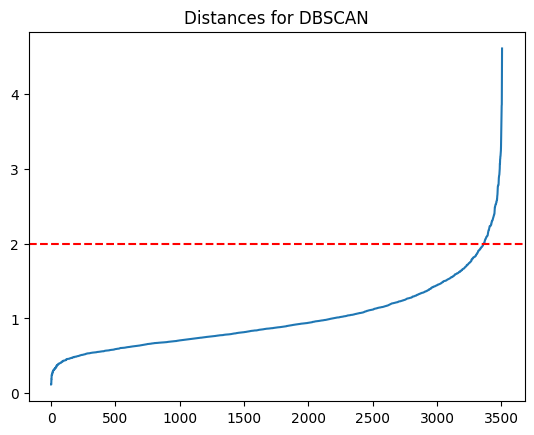

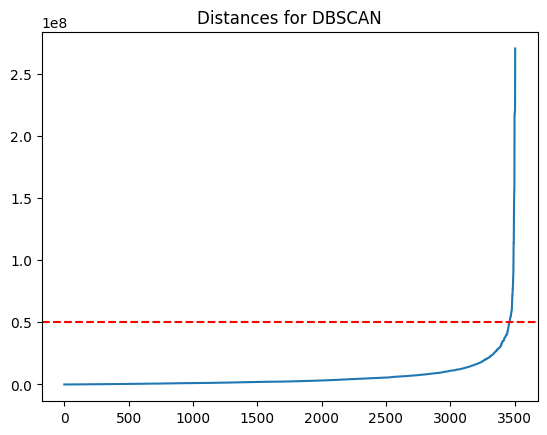

In [7]:
df4_results = pd.DataFrame()
df1_results = pd.DataFrame()
perform_clustering1(df4, 7, df4_results,2)
perform_clustering1(df1, 7, df1_results,50000000)

Na podstawie powyższego wykresu widać, że najsensowniej wybrać wartość eps jako 2, ponieważ tam zaczyna rosnąć najszybiciej.

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df4_tsne = tsne.fit_transform(df4)
df3_tsne = tsne.fit_transform(df3)
df2_tsne = tsne.fit_transform(df2)
df1_tsne = tsne.fit_transform(df1)
df5_tsne = tsne.fit_transform(df5)

# use standard scaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4_s = scaler.fit_transform(df4)
df3_s = scaler.fit_transform(df3)
df2_s = scaler.fit_transform(df2)
df1_s = scaler.fit_transform(df1)
df5_s = scaler.fit_transform(df5)

pca = PCA(n_components=2)
df4_pca = pca.fit_transform(df4_s)
df3_pca = pca.fit_transform(df3_s)
df2_pca = pca.fit_transform(df2_s)
df1_pca = pca.fit_transform(df1_s)
df5_pca = pca.fit_transform(df5_s)


pca = PCA(n_components=3)
df4_pca2 = pca.fit_transform(df4_s)
df3_pca2 = pca.fit_transform(df3_s)
df2_pca2 = pca.fit_transform(df2_s)
df1_pca2 = pca.fit_transform(df1_s)
df5_pca2 = pca.fit_transform(df5_s)


Trenujemy PCA i tSNE.

In [9]:
def plot_clusters(df4, df4_pca, df4_pca2, df4_tsne): # Plotujemy 5 ostatnich kolumn
    # Plot the results using TSNE
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_tsne[:, 0], df4_tsne[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_pca[:, 0], df4_pca[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA2 in 3d using plotly express
    import plotly.express as px
    import plotly.io as pio
    pio.renderers.default = 'browser'
    
    for i, col in enumerate(df4.columns[-10:]):
        fig = px.scatter_3d(x=df4_pca2[:, 0], y=df4_pca2[:, 1], z=df4_pca2[:, 2], color=df4[col])
        fig.show()

In [10]:
def perform_clustering2(df4, N, df4_results):
    # MeanShift
    # how does MeanShift work
    # 1. Randomly initialize the centroids
    # 2. Find the points within the bandwidth distance from the centroid
    # 3. Recompute the centroid as the mean of the points within the bandwidth distance
    # 4. Repeat steps 2 and 3 until convergence

    # what is bandwidth
    # bandwidth is the distance within which the points are considered to be close to each other
    # points outside the bandwidth distance are considered to be outliers

    # how is it different from KMeans
    # 1. MeanShift does not require the number of clusters to be specified
    # 2. MeanShift does not require the data to be stored in memory
    # 3. MeanShift is slower than KMeans

    mean_shift = MeanShift()
    mean_shift.fit(df4)
    df4_results['mean_shift'] = mean_shift.labels_

    # SpectralClustering
    # how does SpectralClustering work
    # 1. Construct a similarity matrix
    # 2. Compute the Laplacian matrix
    # 3. Compute the eigenvectors of the Laplacian matrix
    # 4. Use the eigenvectors to cluster the data

    spectral_clustering = SpectralClustering(n_clusters=N)
    spectral_clustering.fit(df4)
    df4_results['spectral_clustering'] = spectral_clustering.labels_

    # AffinityPropagation
    # how does AffinityPropagation work
    # 1. Compute the similarity matrix
    # 2. Compute the availability matrix
    # 3. Compute the responsibility matrix
    # 4. Compute the cluster centers
    # 5. Assign each data point to the closest cluster center

    affinity_propagation = AffinityPropagation()
    affinity_propagation.fit(df4)
    df4_results['affinity_propagation'] = affinity_propagation.labels_

    # OPTICS
    # how does OPTICS work
    # 1. Construct a reachability graph
    # 2. Compute the ordering of the points
    # 3. Extract the clusters from the ordering

    optics = OPTICS(min_samples=5)
    optics.fit(df4)
    df4_results['optics'] = optics.labels_

    # GaussianMixture
    # how does GaussianMixture work
    # 1. Initialize the parameters of the Gaussian distribution
    # 2. Compute the probability of each data point belonging to each cluster
    # 3. Update the parameters of the Gaussian distribution
    # 4. Repeat steps 2 and 3 until convergence
    
    gaussian_mixture = GaussianMixture(n_components=3)
    gaussian_mixture.fit(df4)
    df4_results['gaussian_mixture'] = gaussian_mixture.predict(df4)

Dodajemy więcej modeli do przetestowania.

In [11]:
perform_clustering2(df4, 7, df4_results)
perform_clustering2(df1, 7, df1_results)

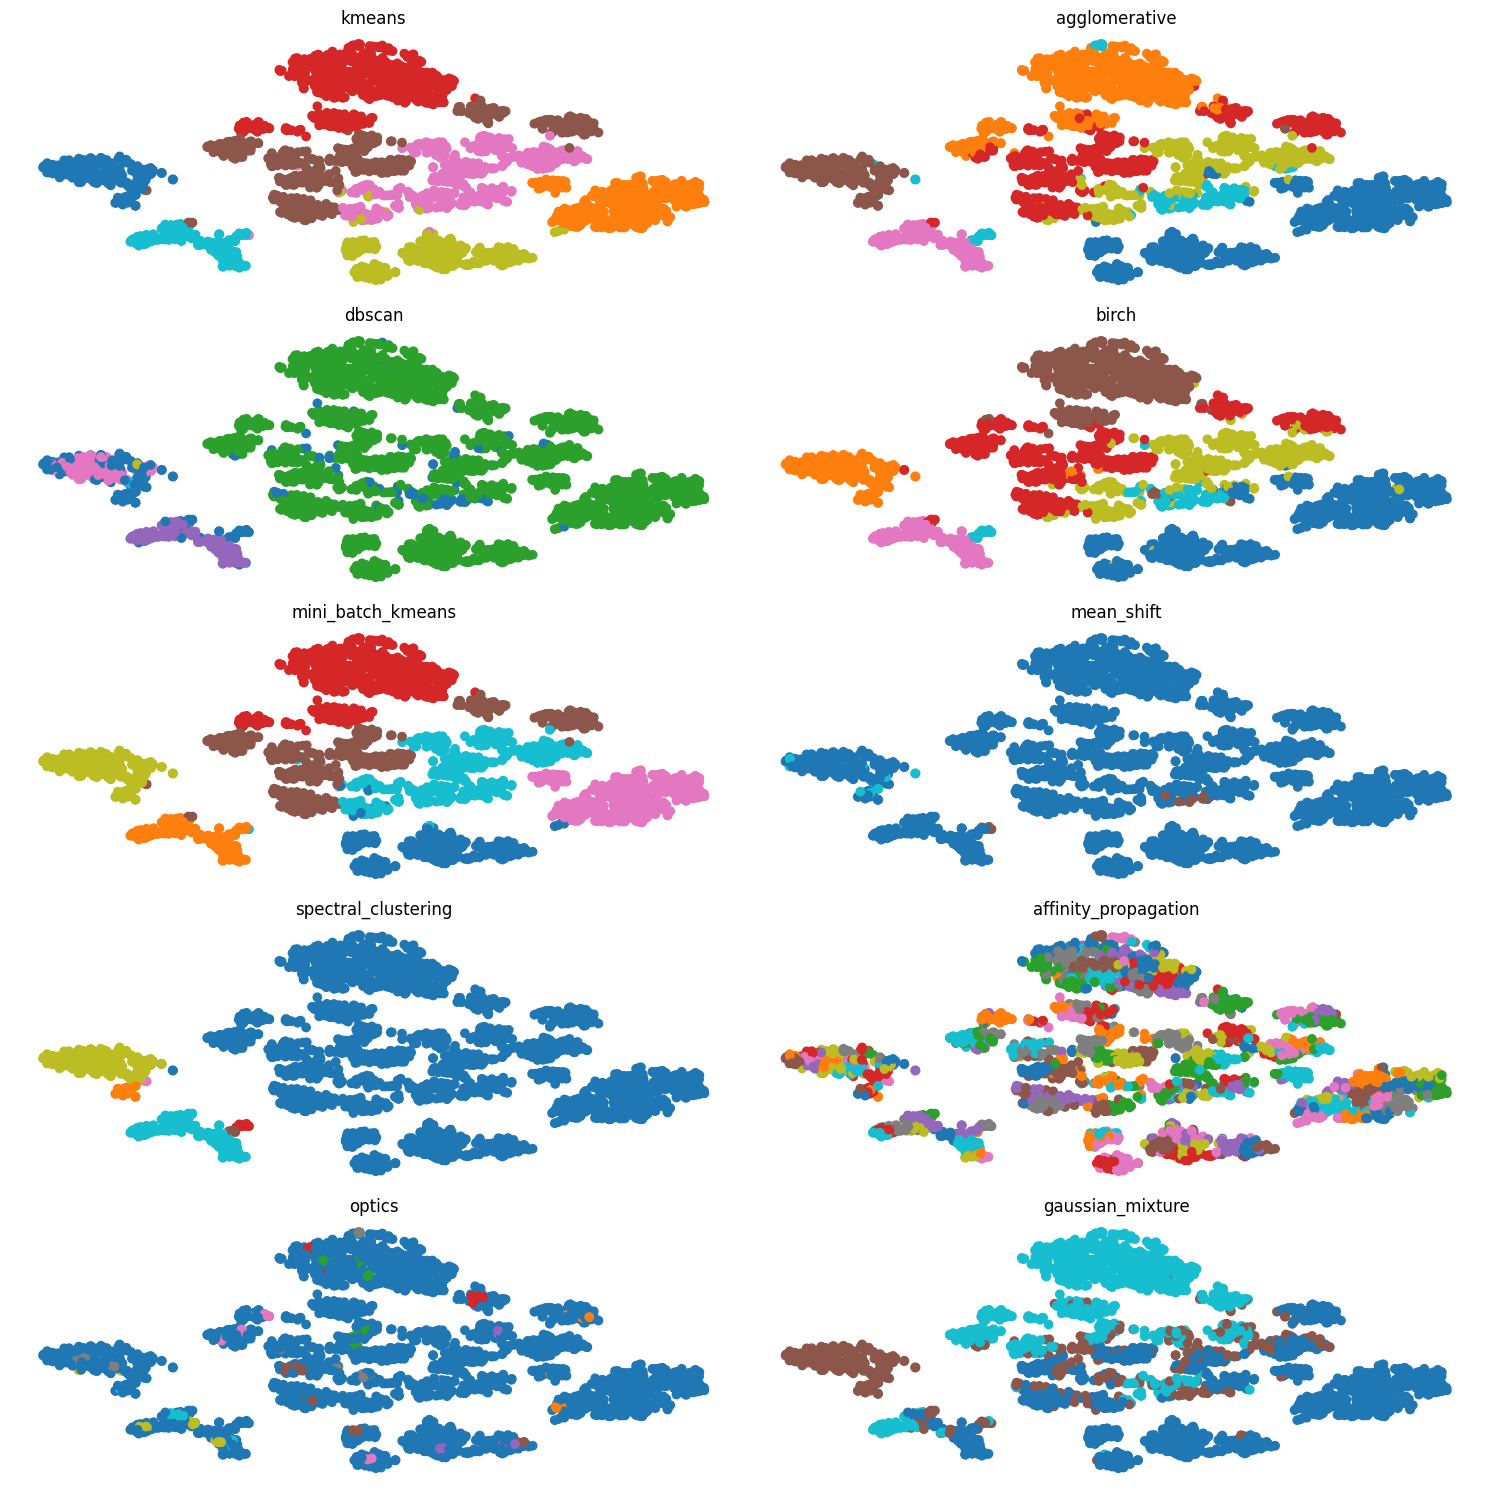

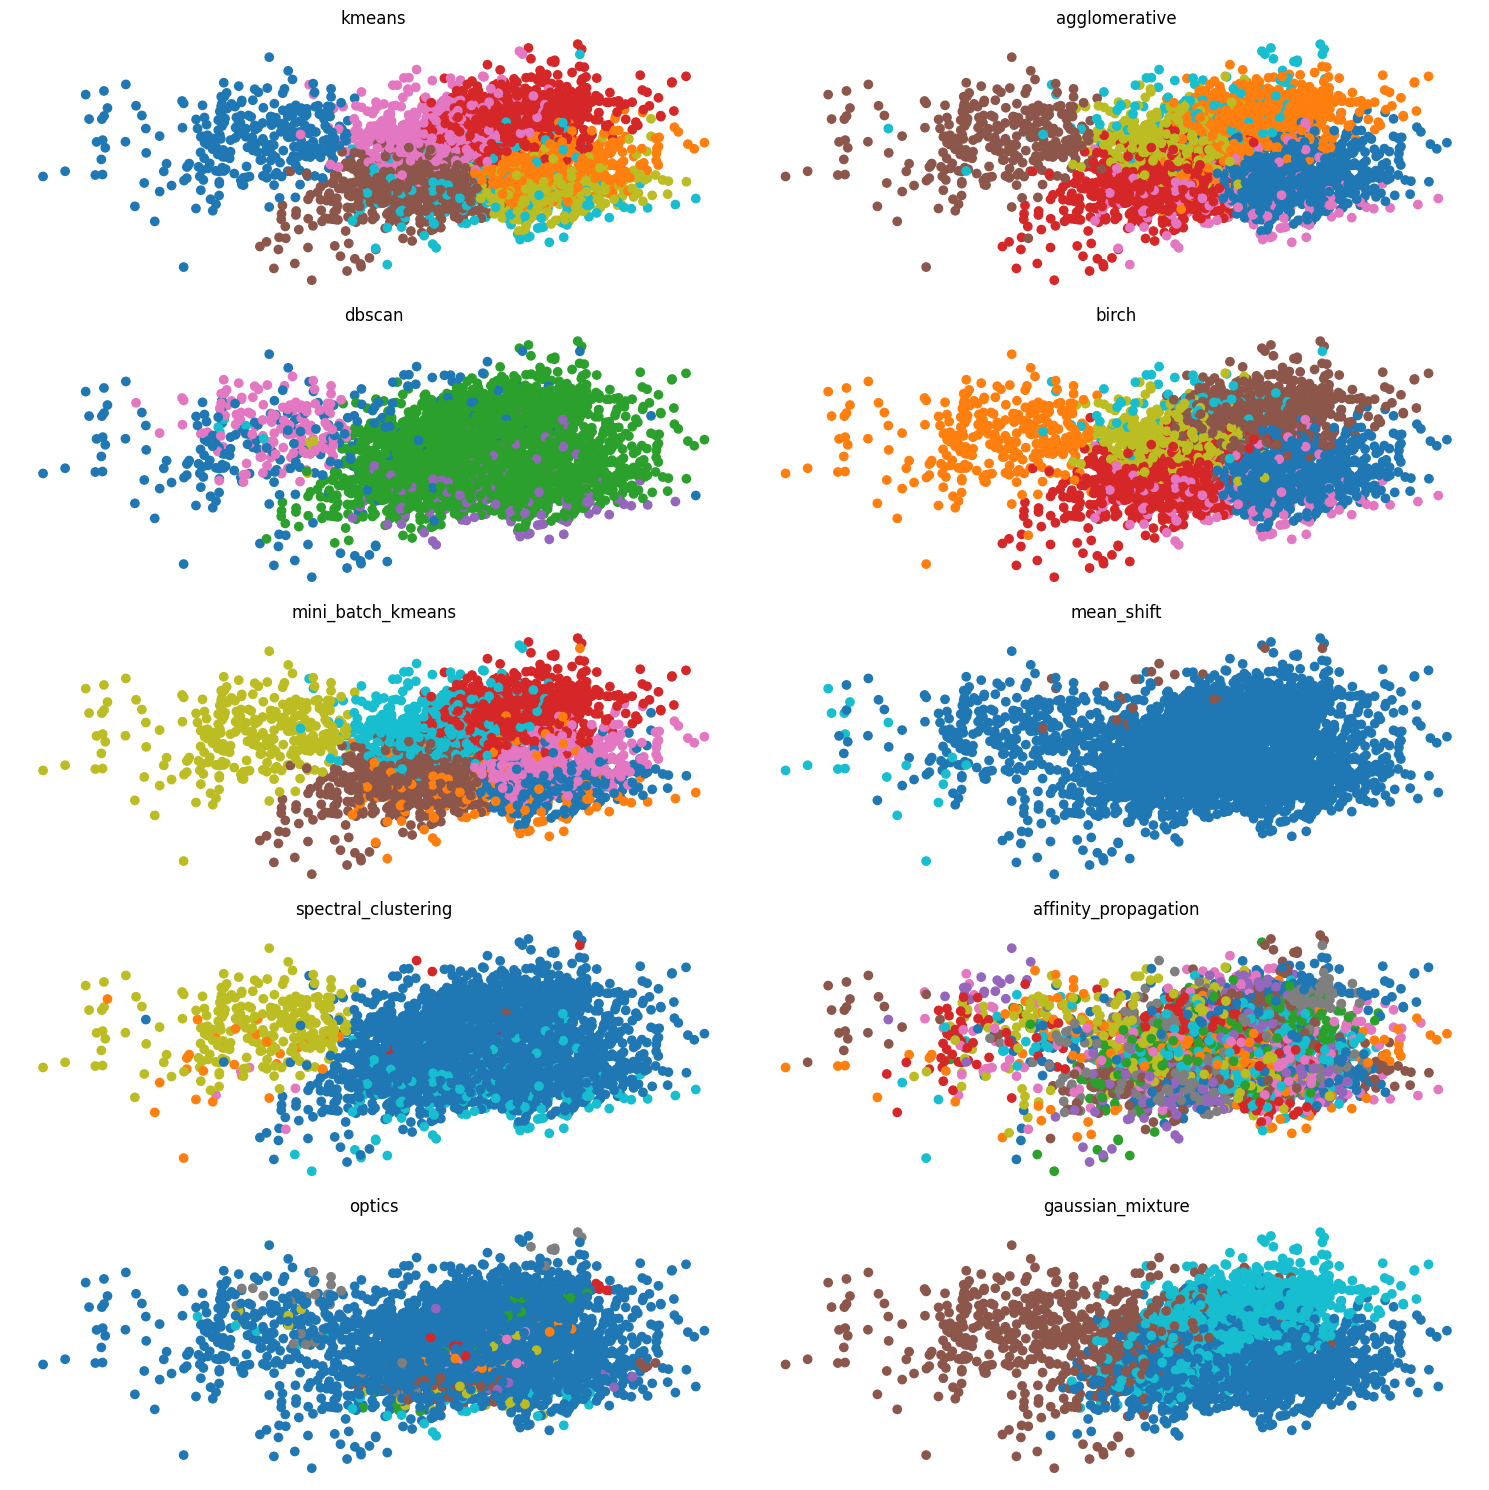

In [12]:
plot_clusters(df4_results, df4_pca, df4_pca2, df4_tsne)

Rysujemy wykresy przedstawiające podział na klastry.

In [13]:
# create a table analysing the results using silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

def calculate_scores(df, df_results):
    scores = pd.DataFrame(index=df_results.columns, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])
    for col in df_results.columns:
        labels = df_results[col]
        if len(set(labels)) > 1:  # check if there is more than one cluster
            scores.loc[col, 'silhouette_score'] = silhouette_score(df, labels)
            scores.loc[col, 'calinski_harabasz_score'] = calinski_harabasz_score(df, labels)
            scores.loc[col, 'davies_bouldin_score'] = davies_bouldin_score(df, labels)
    return scores

Funkcja sprawdzająca wyniki poszczególnych modeli.

In [14]:
df4_results

kmeans  agglomerative  dbscan  birch  mini_batch_kmeans  mean_shift  \
0          4              5       0      5                  6           0   
1          5              0       0      0                  0           0   
2          2              1       0      3                  2           0   
3          1              0       0      0                  4           0   
4          2              1       0      2                  2           0   
...      ...            ...     ...    ...                ...         ...   
3501       4              5       0      5                  6           0   
3502       5              0       0      0                  0           0   
3503       2              1       0      3                  2           0   
3504       1              0       0      0                  4           0   
3505       2              1       0      3                  2           0   

      spectral_clustering  affinity_propagation  optics  gaussian_mixture  
0                       0                    20      -1                 1  
1                       0                    51      -1                 1  
2                       0                    89      -1                 2  
3                       0                    67      -1                 0  
4                       0                    16      -1                 2  
...                   ...                   ...     ...               ...  
3501                    0                   144      -1                 1  
3502                    0                    62      -1                 0  
3503                    0                    77      -1                 2  
3504                    0                    39      -1                 0  
3505                    0                    50      -1                 2  

[3506 rows x 10 columns]

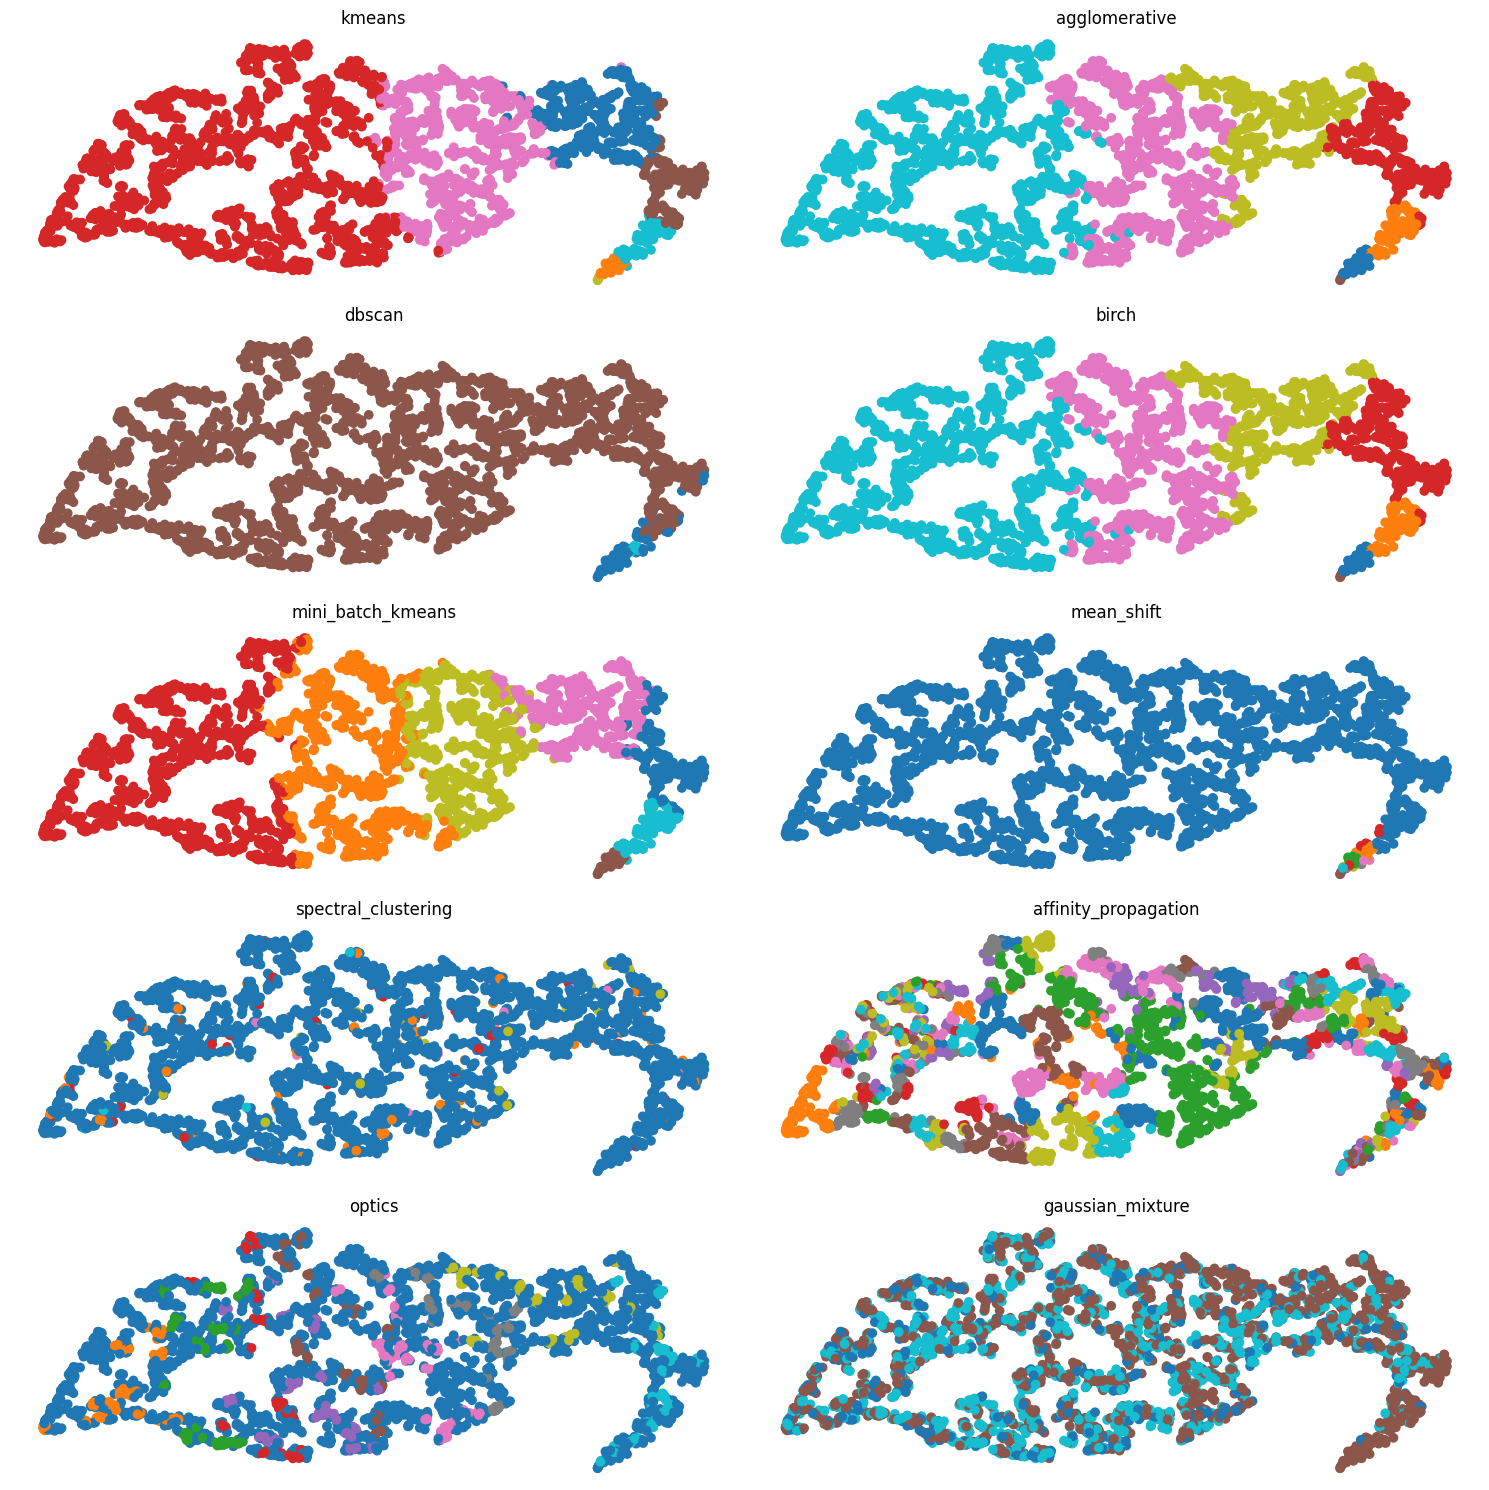

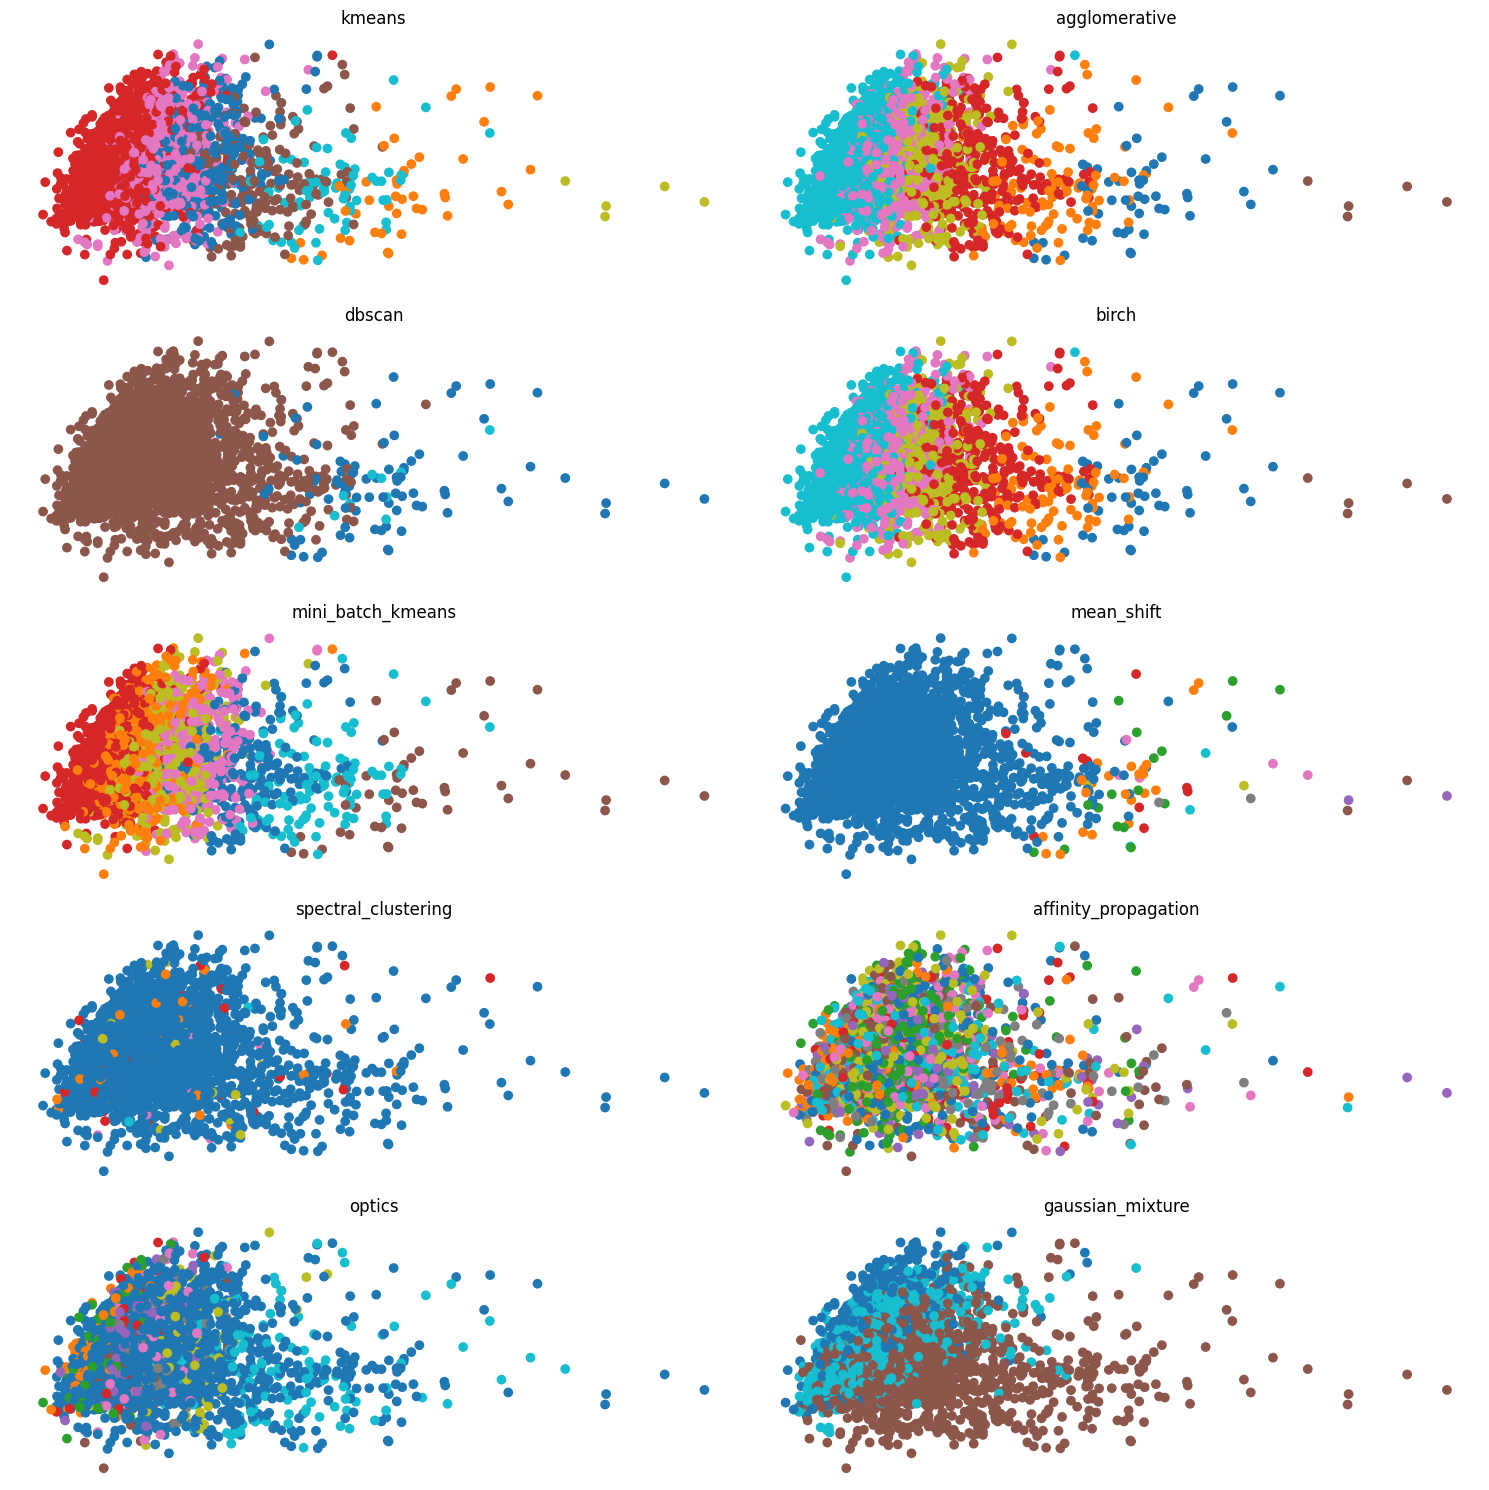

In [49]:
plot_clusters(df1_results, df1_pca, df1_pca2, df1_tsne)

In [15]:
df1_results

kmeans  agglomerative  dbscan  birch  mini_batch_kmeans  mean_shift  \
0          2              6       0      6                  2           0   
1          4              5       0      5                  5           0   
2          4              5       0      5                  5           0   
3          0              5       0      5                  4           0   
4          4              4       0      4                  5           0   
...      ...            ...     ...    ...                ...         ...   
3501       2              4       0      4                  1           0   
3502       4              5       0      5                  5           0   
3503       4              4       0      4                  5           0   
3504       2              4       0      4                  1           0   
3505       4              4       0      4                  5           0   

      spectral_clustering  affinity_propagation  optics  gaussian_mixture  
0                       0                     0       0                 0  
1                       0                   170      -1                 2  
2                       0                    18      -1                 1  
3                       0                   260      -1                 1  
4                       0                    82      -1                 1  
...                   ...                   ...     ...               ...  
3501                    0                   384      74                 1  
3502                    0                   188      -1                 1  
3503                    0                   113      -1                 1  
3504                    0                   384      -1                 2  
3505                    0                   244      -1                 1  

[3506 rows x 10 columns]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [17]:
def calculate_best_model(scores):
    scaler = MinMaxScaler()
    epsilon = 1e-5

    # Przeskalowanie kolumny 'calinski_harabasz_score'
    scores['calinski_harabasz_score_scaled'] = scaler.fit_transform(scores[['calinski_harabasz_score']])
    scores['calinski_harabasz_score_scaled'] = scores['calinski_harabasz_score_scaled'] * (1 - 2 * epsilon) + epsilon

    # Przeskalowanie kolumny 'davies_bouldin_score'
    scores['davies_bouldin_score_scaled'] = scaler.fit_transform(scores[['davies_bouldin_score']])
    scores['davies_bouldin_score_scaled'] = scores['davies_bouldin_score_scaled'] * (1 - 2 * epsilon) + epsilon

    scores = scores[scores['silhouette_score'] > 0]

    # Silhouette score
    max_silhouette_score = scores['silhouette_score'].max()
    scores['silhouette_score_scaled'] = scores['silhouette_score'] / max_silhouette_score
    scores.loc[scores['silhouette_score'] == max_silhouette_score, 'silhouette_score_scaled'] = 1

    # Calinski-Harabasz score
    max_calinski_score = scores['calinski_harabasz_score_scaled'].max()
    scores['calinski_score_scaled'] = scores['calinski_harabasz_score_scaled'] / max_calinski_score
    scores.loc[scores['calinski_harabasz_score_scaled'] == max_calinski_score, 'calinski_score_scaled'] = 1  

    # Davies-Bouldin score
    min_davies_score = scores['davies_bouldin_score_scaled'].min()
    scores['davies_score_scaled'] = 1 - min_davies_score / scores['davies_bouldin_score_scaled'] 
    scores.loc[scores['davies_bouldin_score_scaled'] == min_davies_score, 'davies_score_scaled'] = 1   

    # Suma
    scores['suma'] = scores['silhouette_score_scaled'] + scores['calinski_score_scaled'] + scores['davies_score_scaled']

    # Zapewnienie, że kolumna 'suma' jest typu float
    scores['suma'] = scores['suma'].astype(float)

    # Indeks najlepszego algorytmu
    best_algorithm_index = scores['suma'].idxmax()
    return best_algorithm_index


Funkjca do wyboru najlepszego modelu.

In [18]:
scores_df4 = calculate_scores(df4, df4_results)
print(scores_df4)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.207956              660.188479   
agglomerative                0.219567              613.568485   
dbscan                       0.144495              202.329726   
birch                        0.219437              617.760437   
mini_batch_kmeans            0.207888              660.190823   
mean_shift                    0.33761                68.75433   
spectral_clustering          0.239462              206.933878   
affinity_propagation         0.135891              120.948563   
optics                      -0.458411                8.344191   
gaussian_mixture             0.160406              627.806769   

                     davies_bouldin_score  
kmeans                           1.563735  
agglomerative                    1.619636  
dbscan                           2.221054  
birch                            1.575808  
mini_batch_kmeans                1.563323  
mean_shift          

Wypisujemy wyniki jakie otrzymały poszczególne modele dla ramki danych df4.

In [19]:
scores_df1 = calculate_scores(df1, df1_results)
print(scores_df1)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.500649             7788.459778   
agglomerative                0.421027             6941.199597   
dbscan                       0.758833             1940.795344   
birch                        0.421027             6941.199597   
mini_batch_kmeans            0.383599             4343.918076   
mean_shift                   0.688682              888.209209   
spectral_clustering         -0.554414                0.240124   
affinity_propagation         0.192817             1535.343653   
optics                      -0.414591                9.052247   
gaussian_mixture            -0.217437                94.98812   

                     davies_bouldin_score  
kmeans                           0.712788  
agglomerative                    0.752019  
dbscan                           1.189924  
birch                            0.752019  
mini_batch_kmeans                0.862736  
mean_shift          

Wypisujemy wyniki jakie otrzymały poszczególne modele dla ramki danych df1 i porównujemy wyniki z obu tych ramek.

Widać, że najlepiej radzi sobie model mean_shift i kmeans. 

In [20]:
# plot the results
def plot_scores(scores):
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    for i, (score, ax) in enumerate(zip(scores.columns, axs.flatten())):
        ax.bar(scores.index, scores[score])
        ax.set_title(score)
        ax.set_xticklabels(scores.index, rotation=45)
        ax.grid()
    plt.tight_layout()
    plt.show()

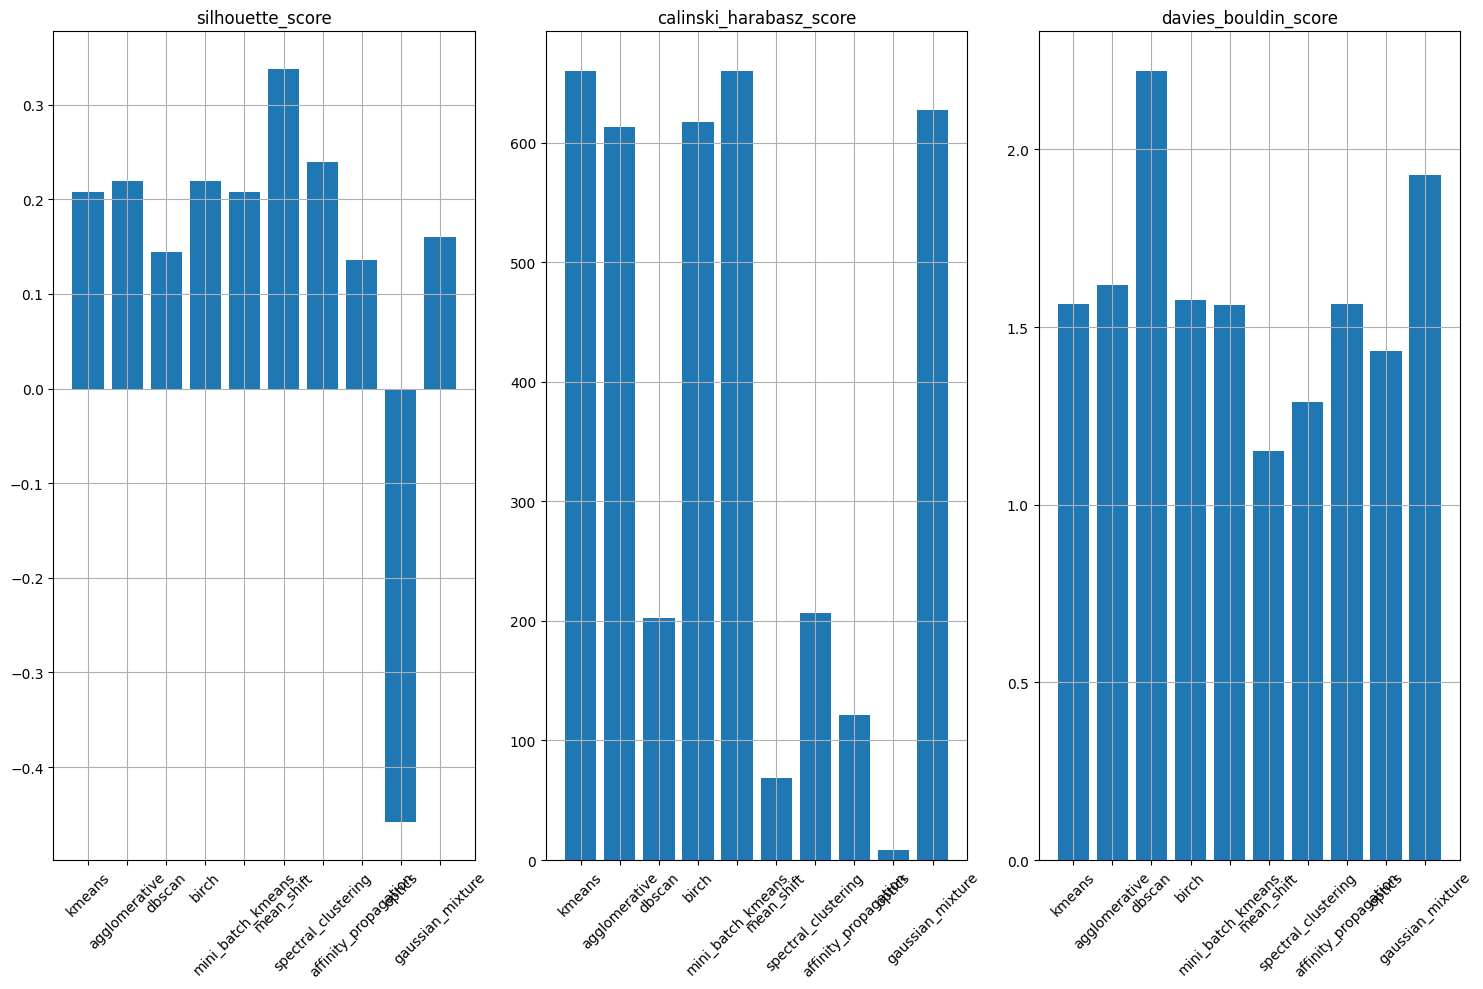

In [21]:
scores_df4 = calculate_scores(df4, df4_results)
plot_scores(scores_df4)

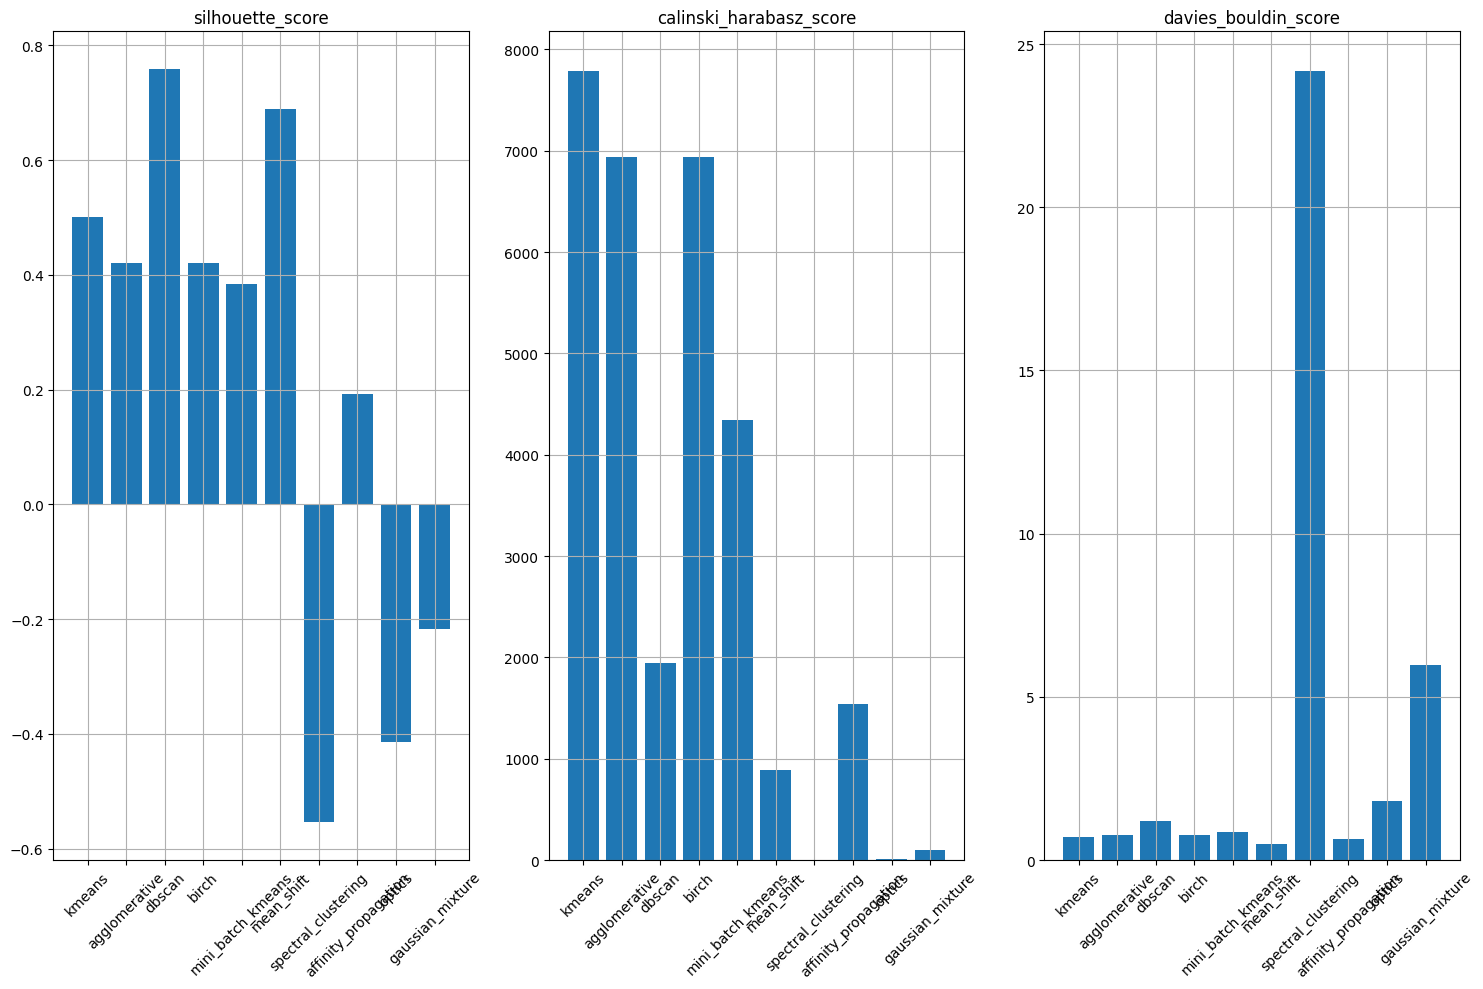

In [45]:
plot_scores(scores_df1)

In [22]:
calculate_best_model(scores_df4)

'kmeans'

Najlepszy model dla ramki danych df4.

In [23]:
calculate_best_model(scores_df1)

'kmeans'

Najlepszy model dla ramki danych df1.

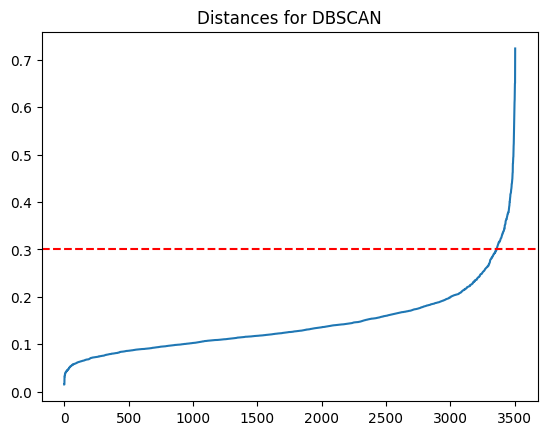

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.549174             6705.754263   
agglomerative                0.549174             6705.754263   
dbscan                       0.316543              1497.54362   
birch                        0.492886             3138.821019   
mini_batch_kmeans            0.545518             6085.641995   
mean_shift                   0.388411             2038.475027   
spectral_clustering          0.539918             6456.047466   
affinity_propagation          0.19222              2598.02823   
optics                      -0.676545                8.084837   
gaussian_mixture             0.494516              4472.20256   

                     davies_bouldin_score  
kmeans                           0.775842  
agglomerative                    0.775842  
dbscan                           1.559174  
birch                            0.929338  
mini_batch_kmeans                0.814767  
mean_shift          

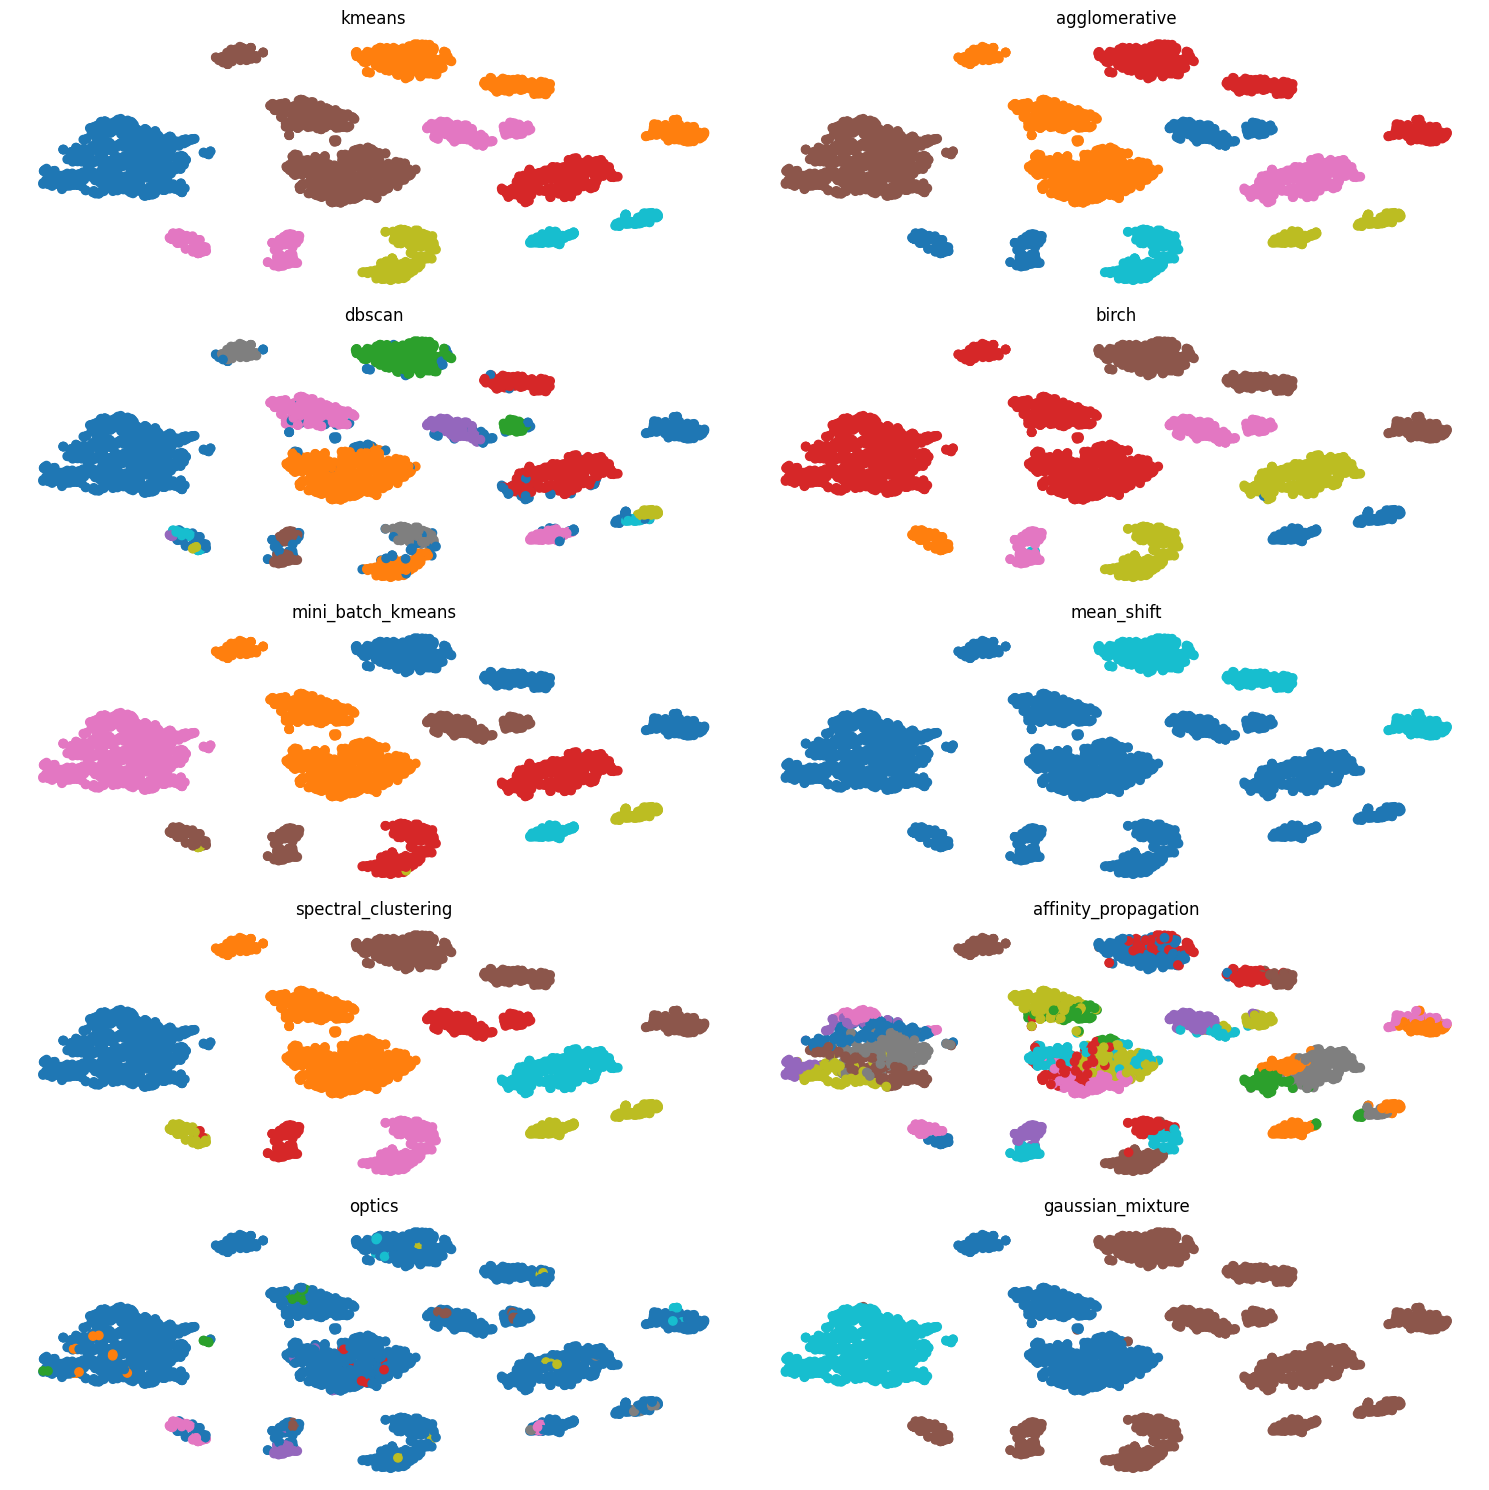

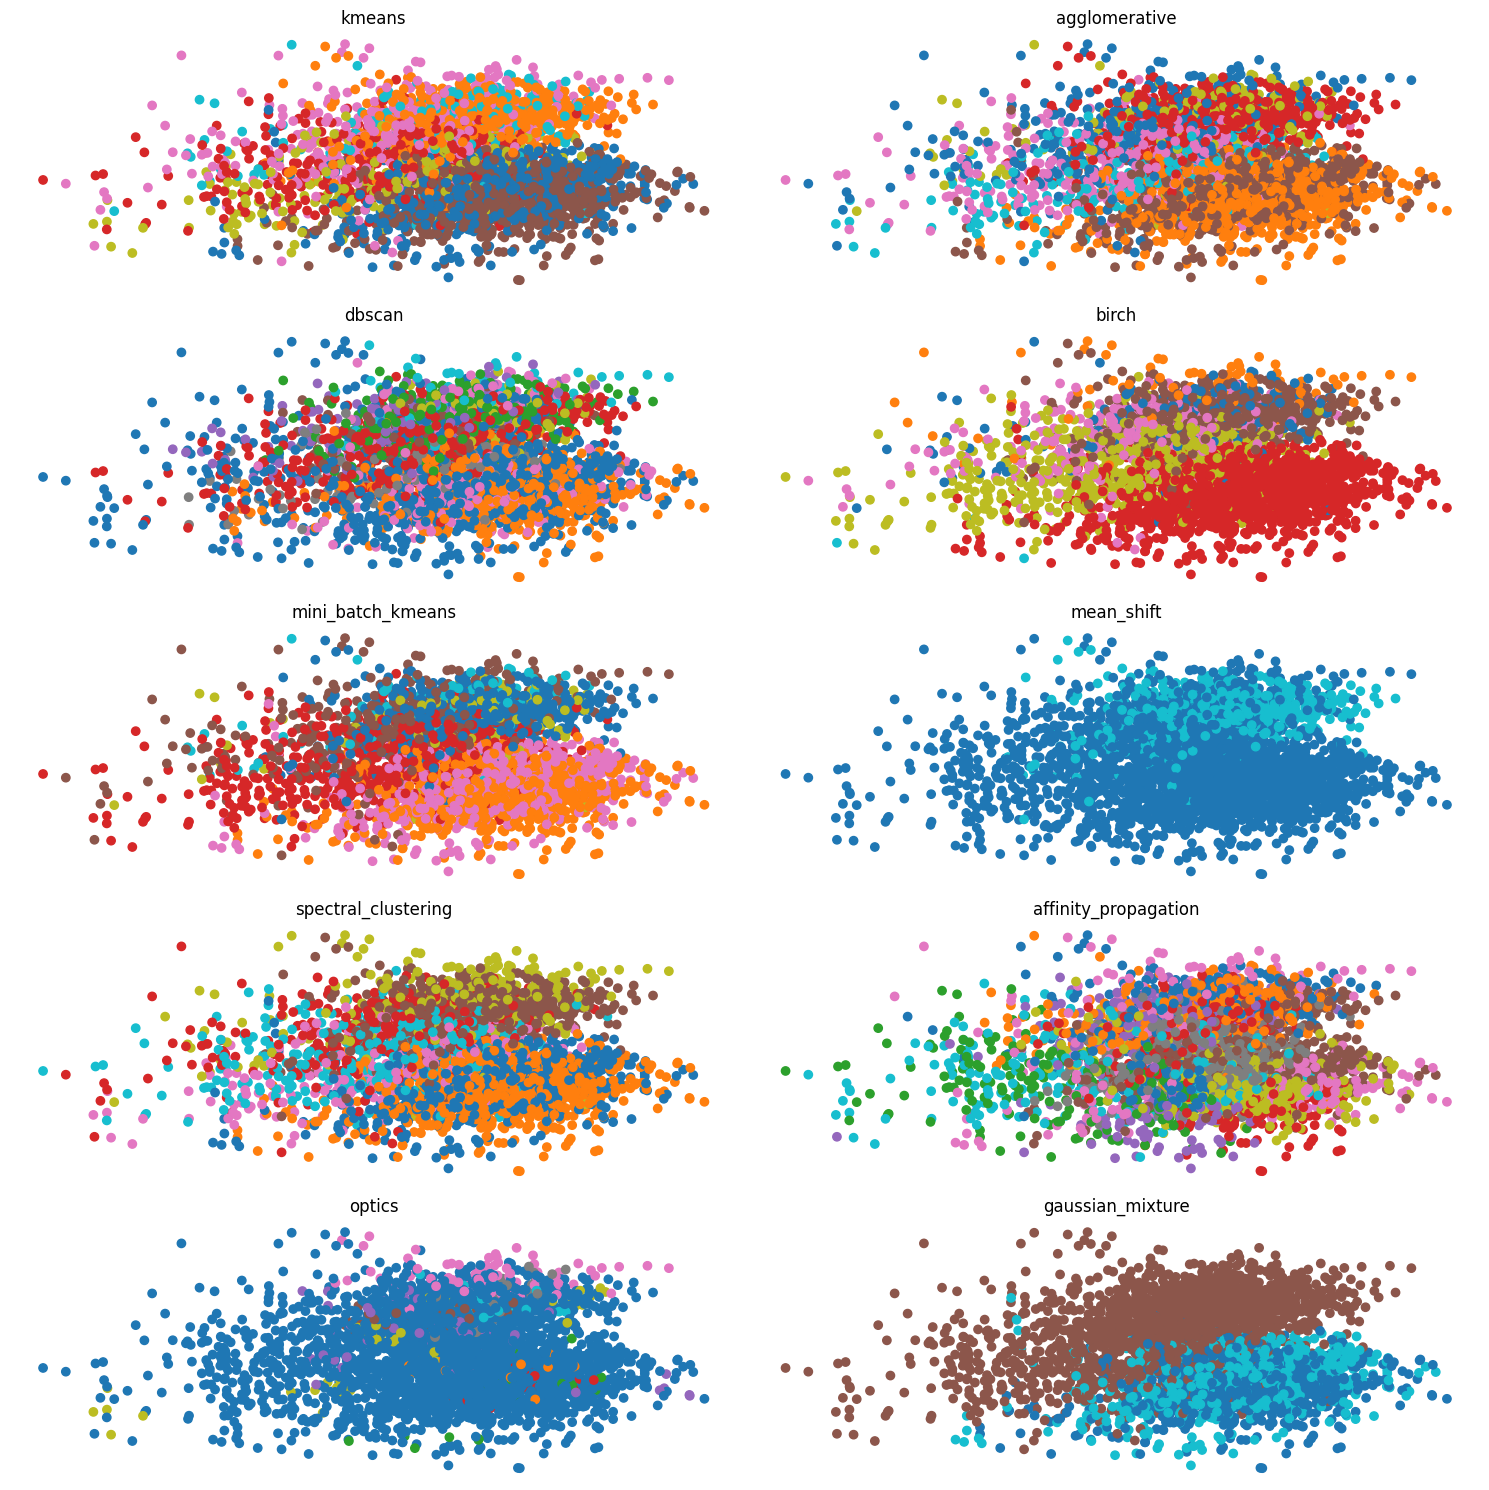

In [24]:
#wyżej sprawdzone tylko dla df4, teraz dla df3
#uwaga trzeba recznie w dbscanie w perform_clustering1 zmienić eps na lepsze, bo inaczej nie działa dobrze, dla df3 np były dobry 0.30 na oko eps
df3_results = pd.DataFrame()
perform_clustering1(df3, 7, df3_results,0.3)
perform_clustering2(df3, 7, df3_results)
scores_df3 = calculate_scores(df3, df3_results)
print(scores_df3)

# plot the results
plot_clusters(df3_results,df3_pca, df3_pca2, df3_tsne)

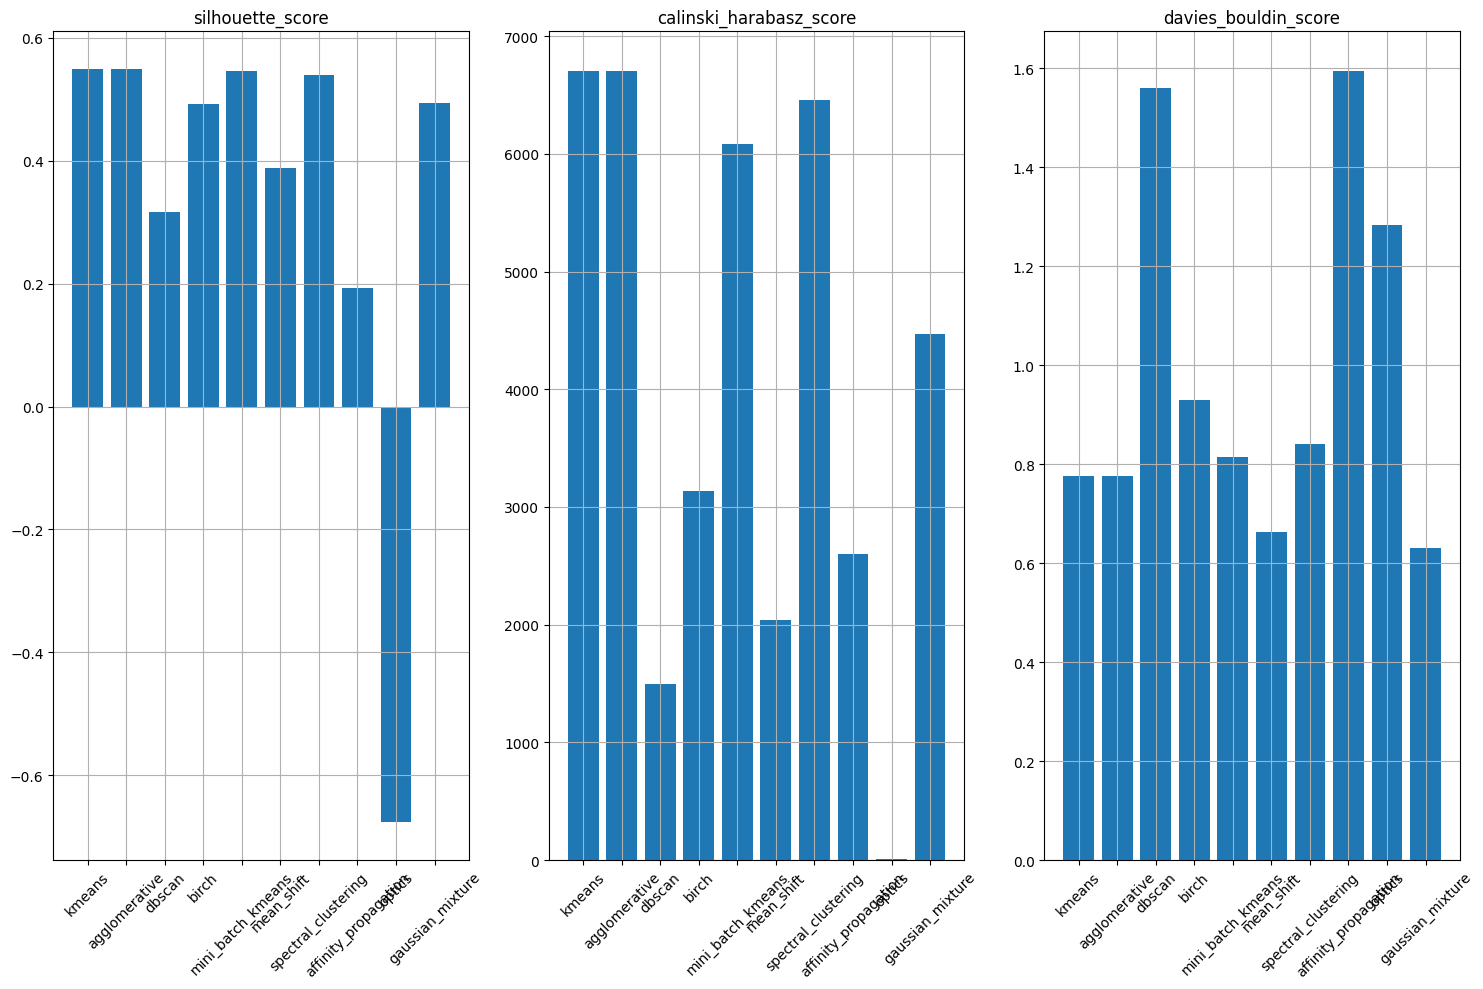

In [25]:
plot_scores(scores_df3)

In [26]:
calculate_best_model(scores_df3)

'kmeans'

Sprawdzamy wyniki dla ramki danych df3.

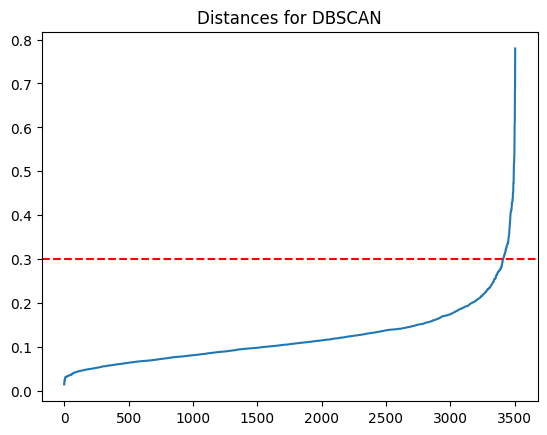

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.506774             6409.154914   
agglomerative                0.418421             6949.000307   
dbscan                       0.343542             1451.271435   
birch                         0.55726             5864.948629   
mini_batch_kmeans            0.488153             6340.754314   
mean_shift                   0.504277              4840.10883   
spectral_clustering           0.50206             6596.976276   
affinity_propagation         0.200404             2498.437161   
optics                      -0.623405                12.97135   
gaussian_mixture              0.53288             6807.899592   

                     davies_bouldin_score  
kmeans                           1.030537  
agglomerative                     1.02161  
dbscan                           1.529835  
birch                            0.802125  
mini_batch_kmeans                1.015391  
mean_shift          

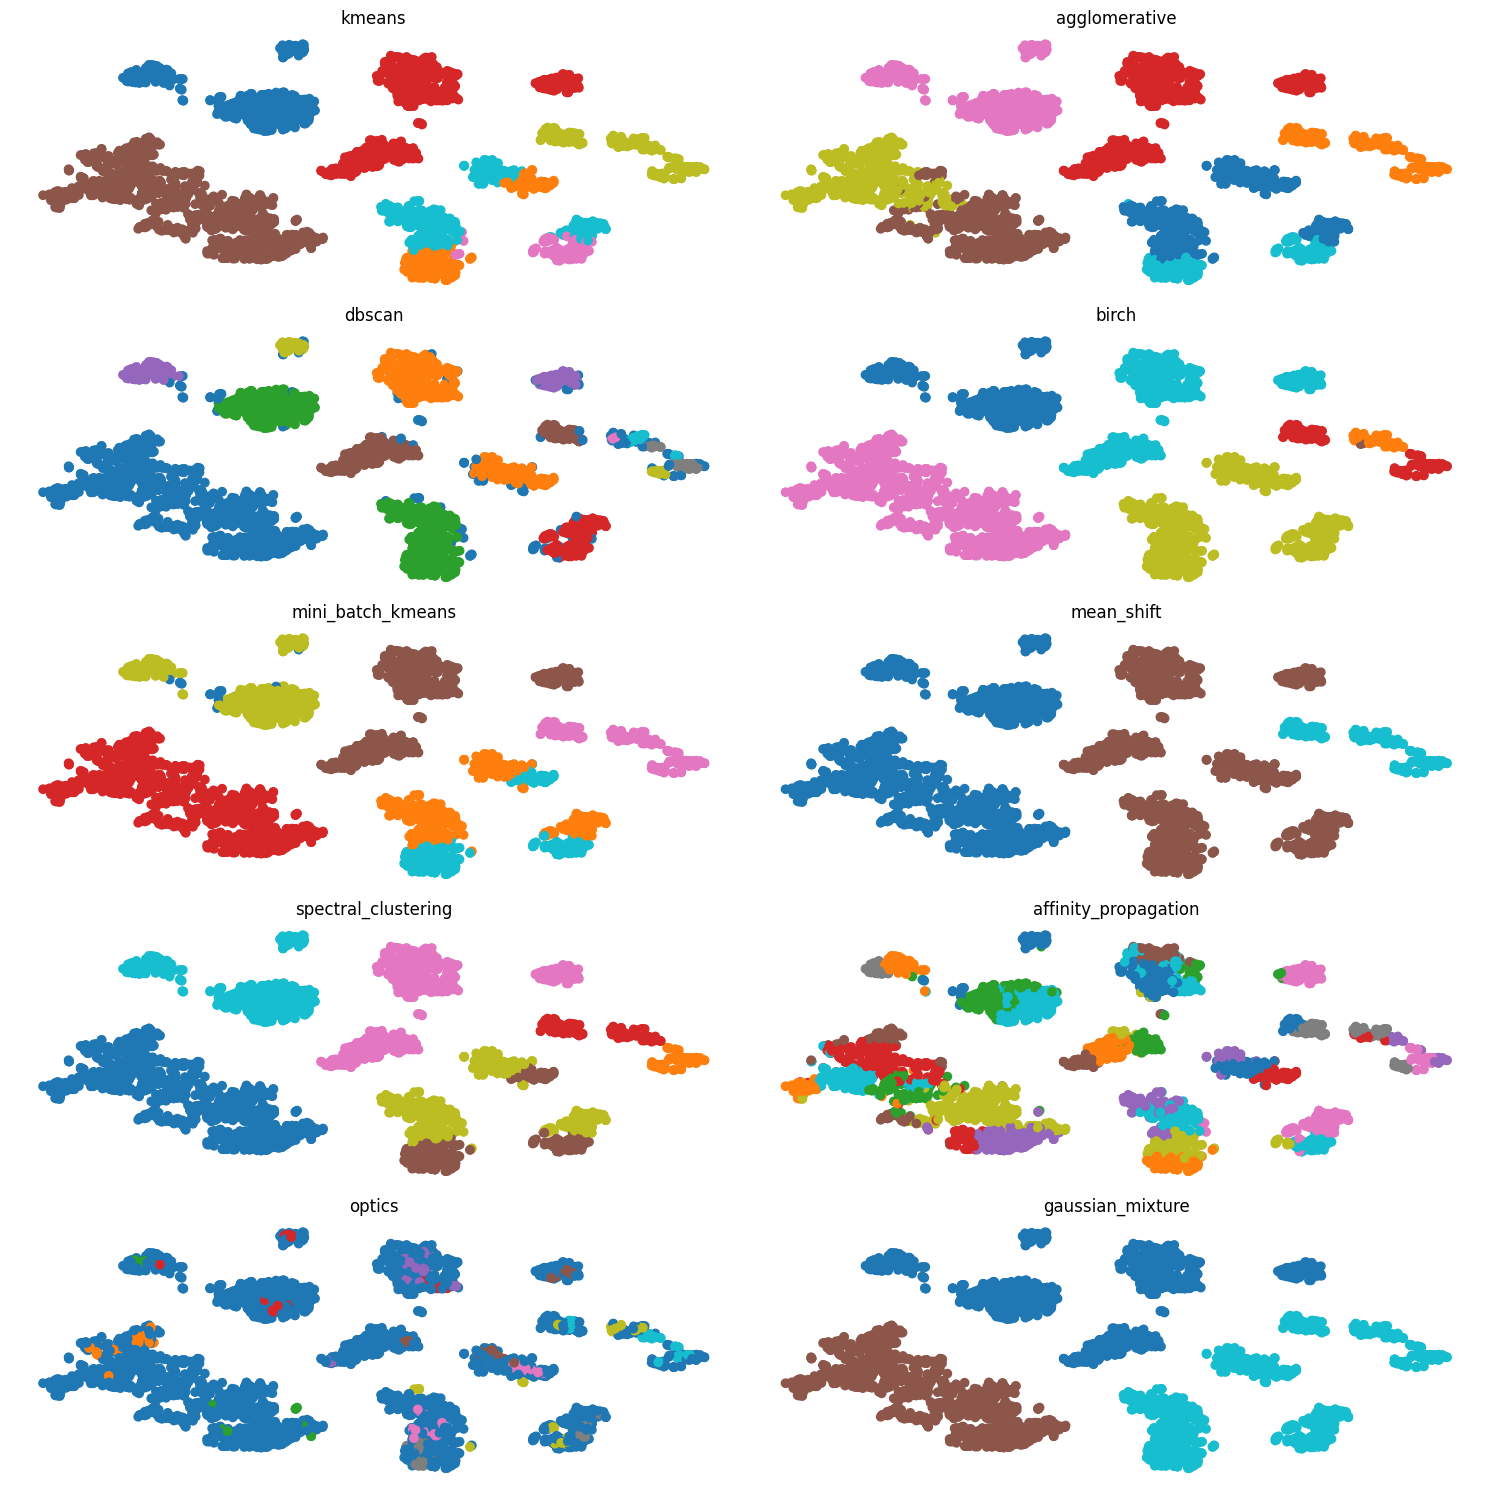

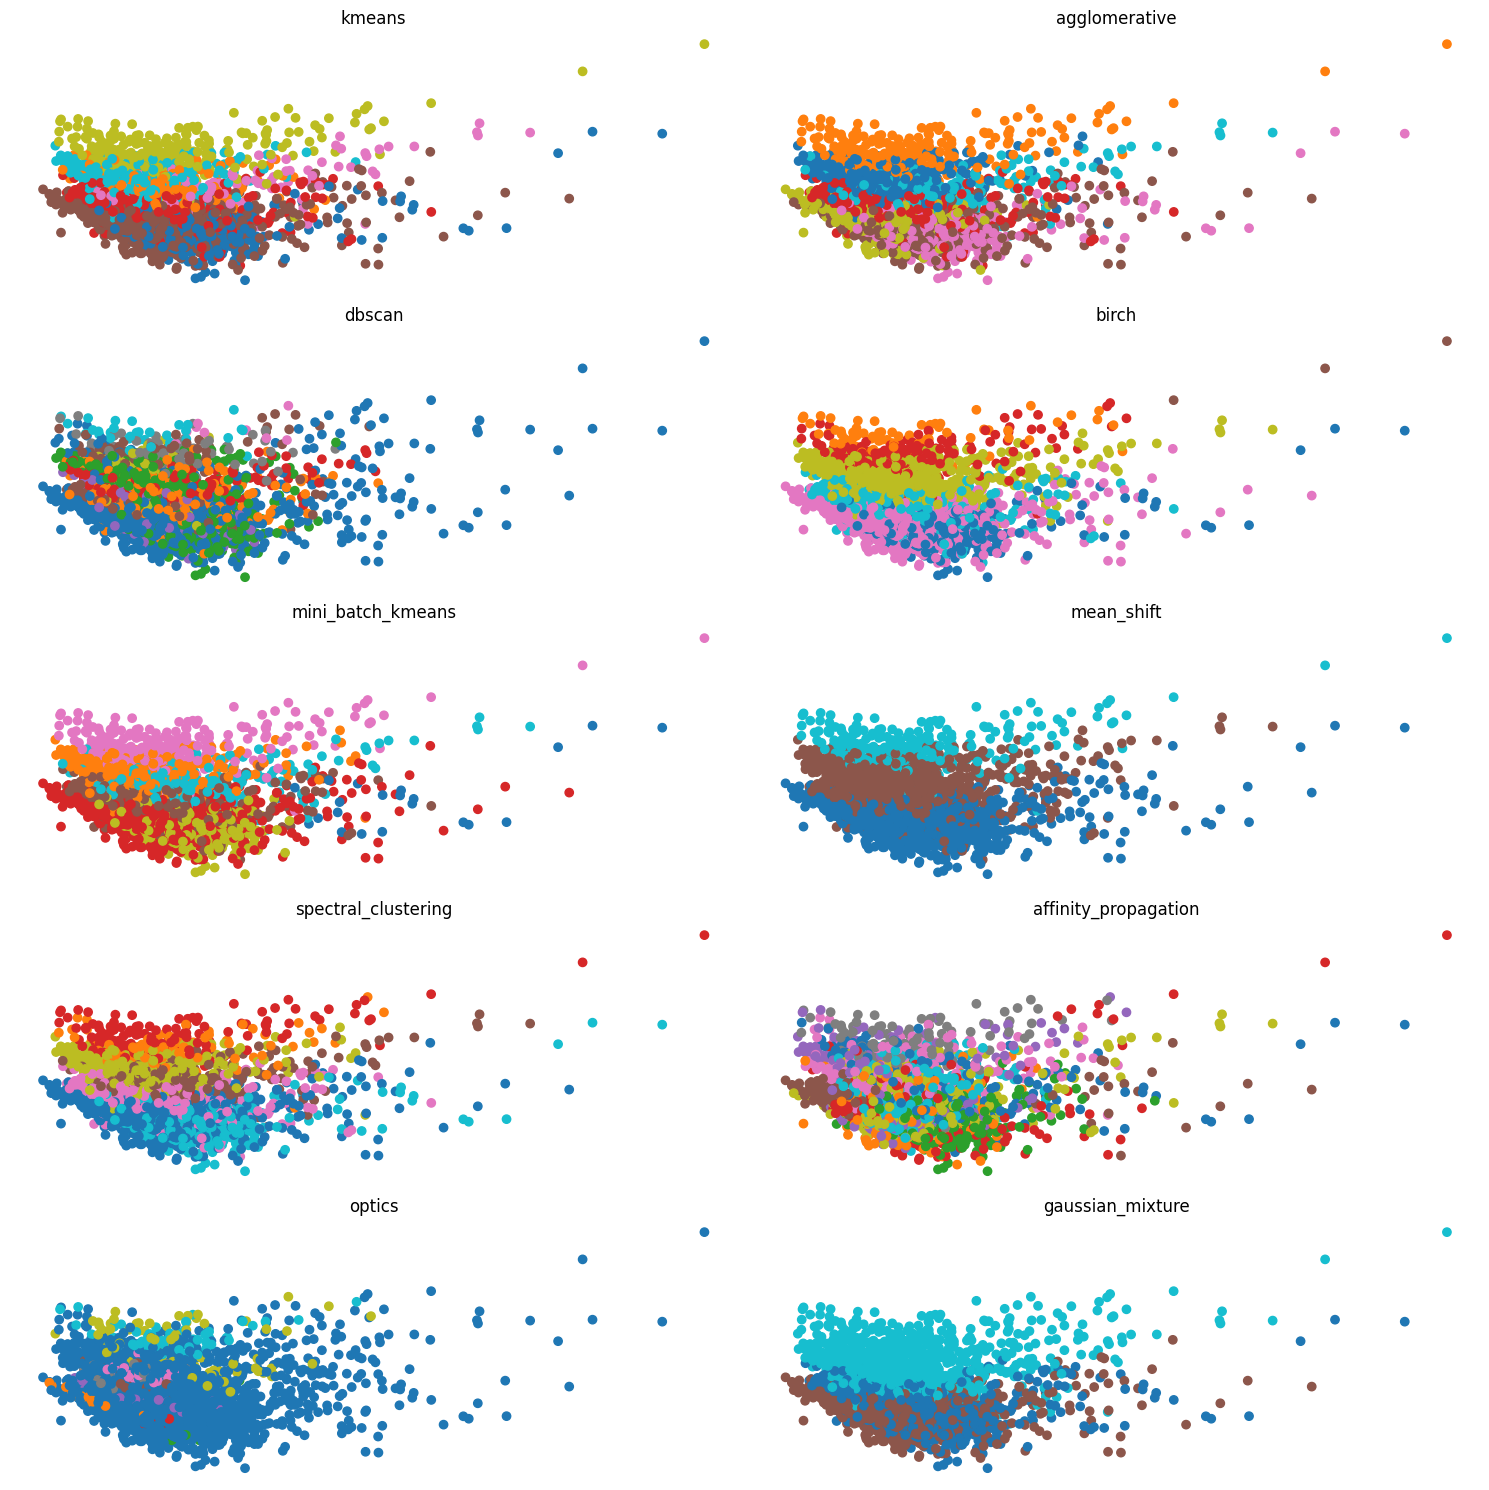

In [27]:
df2_results = pd.DataFrame()
perform_clustering1(df2, 7, df2_results,0.3)
perform_clustering2(df2, 7, df2_results)
scores_df2 = calculate_scores(df2, df2_results)
print(scores_df2)

# plot the results
plot_clusters(df2_results,df2_pca, df2_pca2, df2_tsne)

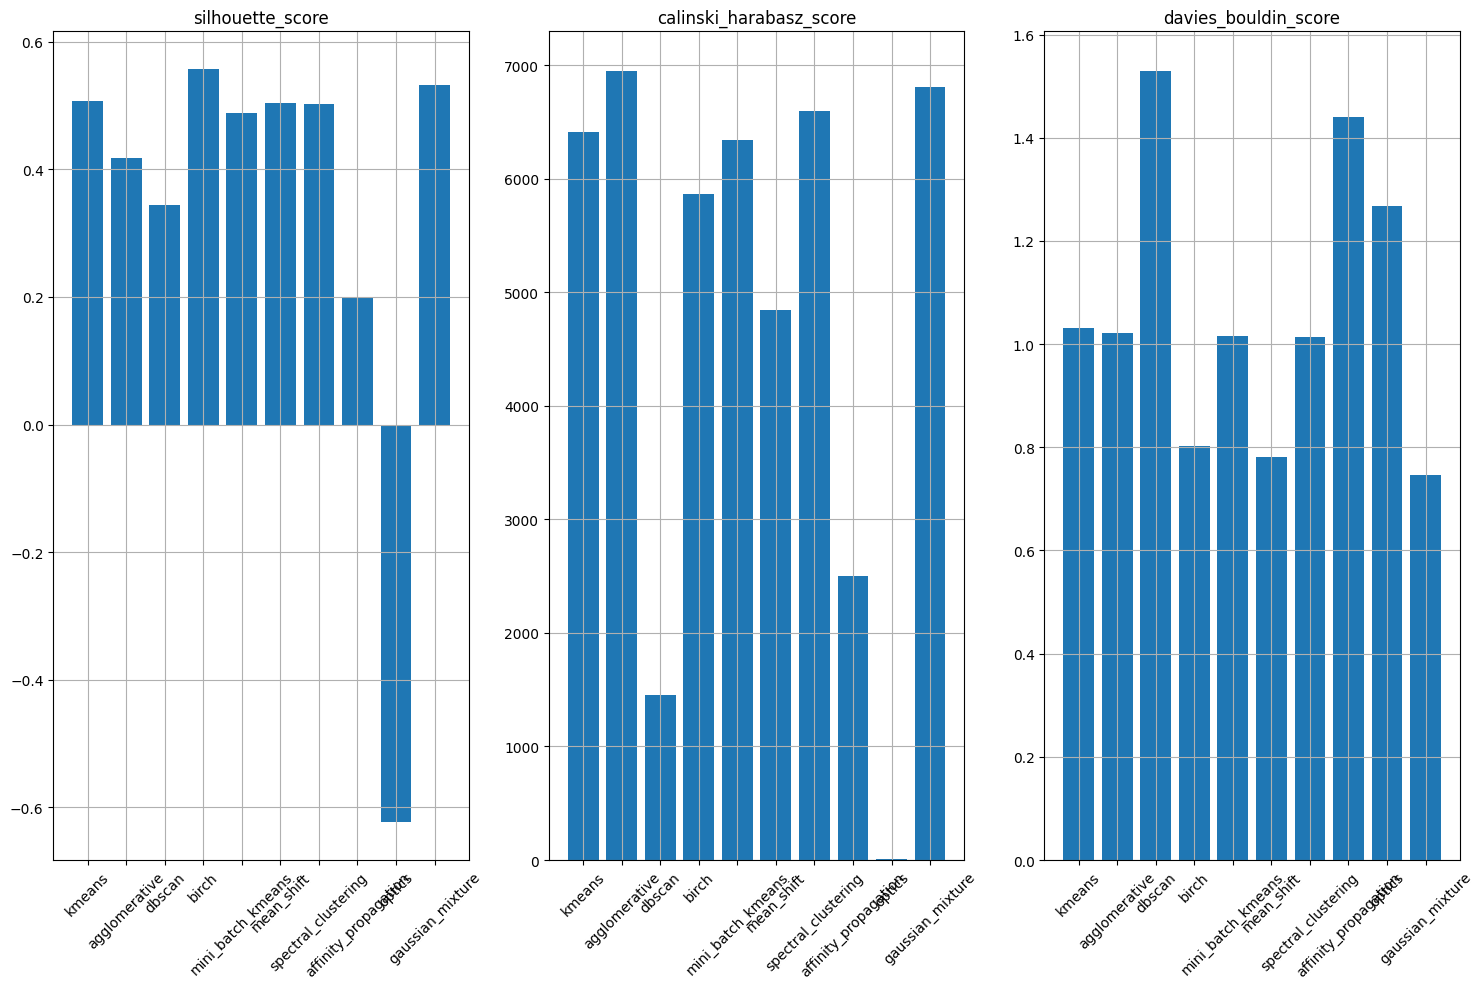

In [48]:
plot_scores(scores_df2)


Sprawdzamy wyniki dla ramki danych df2.

### Sieci neuronowe

In [57]:
df1 = df1.drop("movie_title", axis  =1)

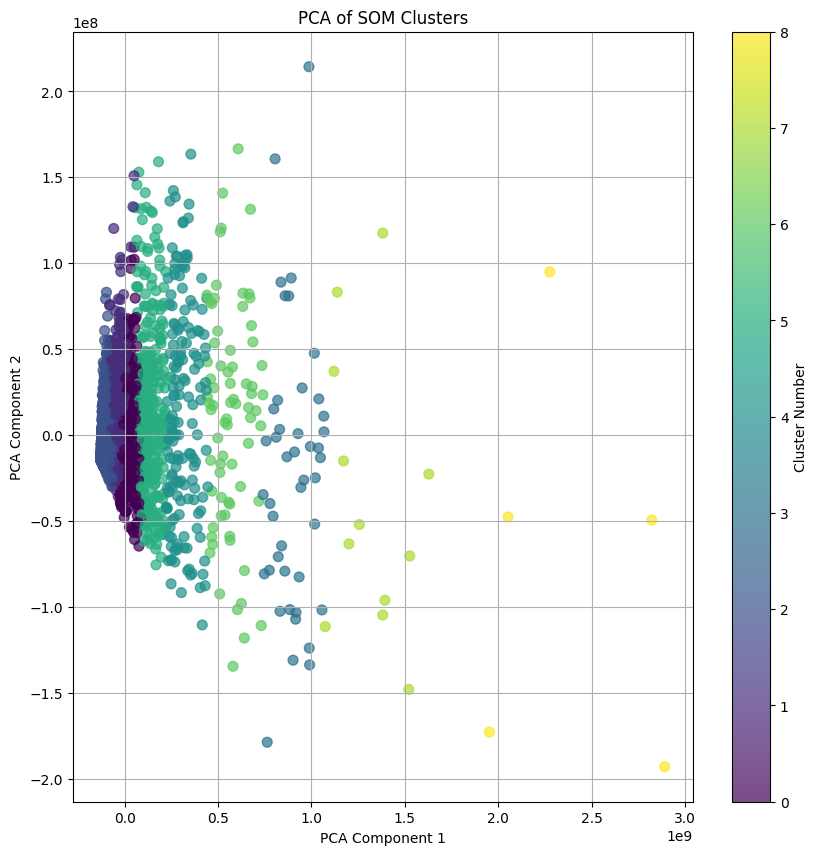

Silhouette Score: 0.4422938894155408
Calinski-Harabasz Score: 7470.768315659569
Davies-Bouldin Score: 0.84499979719215


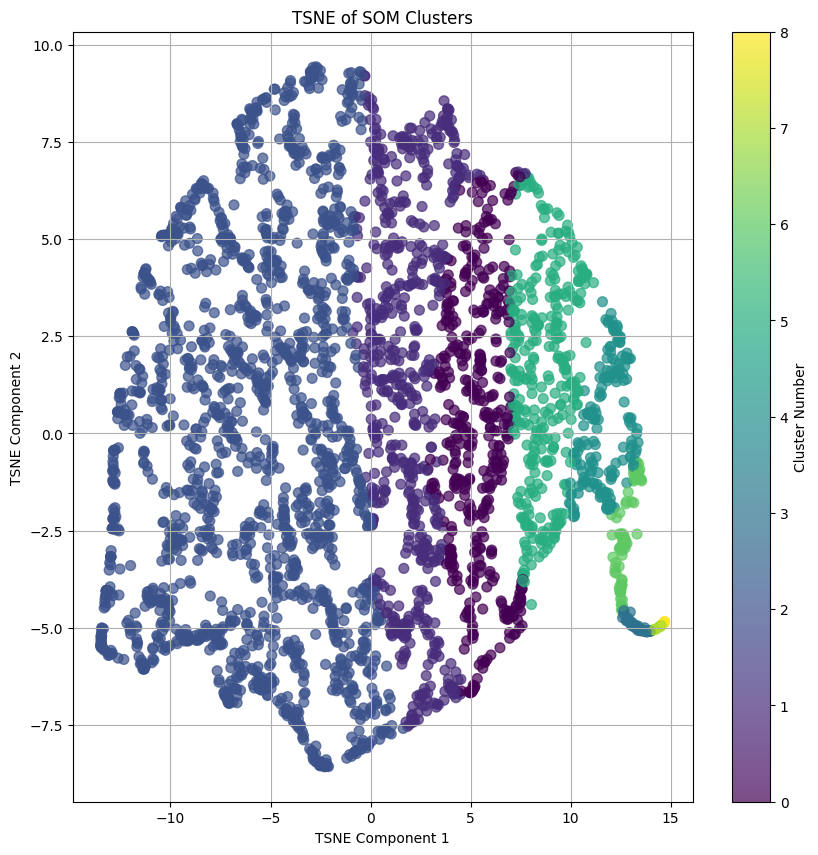

In [58]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#set random seed
np.random.seed(4324)



# Step 1: Create some example data
data_array = df1.to_numpy() # 100 samples, each with 3 features


# Step 2: Initialize the SOM
som_width = 3
som_height = 3
input_len = data_array.shape[1]
sigma = 0.1
learning_rate = 0.5

som = MiniSom(som_height, som_width, input_len, sigma=sigma, learning_rate=learning_rate)

# Initialize the weights
som.random_weights_init(data_array)

# Train the SOM
num_iterations = 10000
som.train_random(data_array, num_iterations)

# Step 3: Assign cluster numbers based on the BMUs
# Get the coordinates of the winning neurons (BMUs) for each input sample
winners = np.array([som.winner(x) for x in data_array])

# Assign a unique cluster number to each BMU
# Flatten the grid coordinates to a single cluster number
cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(som_height, som_width))

# Step 4: Perform PCA for dimensionality reduction
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_array)

# Step 5: Visualize the clusters in a 2D scatter plot using the PCA results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('PCA of SOM Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


# Step 6: Calculate and print the clustering scores
sil_score = silhouette_score(data_array, cluster_numbers)
calinski_score = calinski_harabasz_score(data_array, cluster_numbers)
davies_score = davies_bouldin_score(data_array, cluster_numbers)

print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Score: {calinski_score}')
print(f'Davies-Bouldin Score: {davies_score}')

# Plot the results using TSNE
from sklearn.manifold import TSNE

# Perform TSNE on the PCA results
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
data_tsne = tsne.fit_transform(data_array)

# Visualize the clusters in a 2D scatter plot using the TSNE results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_numbers, cmap='viridis', s=50, alpha=0.7)
plt.title('TSNE of SOM Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(scatter, label='Cluster Number')
plt.grid()
plt.show()


Sieci neuronowe z wykorzystaniem biblioteki minisom. Jak widać model osiąga dobre wyniki.

In [60]:
from itertools import product
from minisom import MiniSom
from sklearn.metrics import silhouette_score

def optimize_som_hyperparameters(data, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations):
    best_score = float('-inf')
    best_params = {}

    for width, height, sigma, learning_rate in product(som_width_range, som_height_range, sigma_range, learning_rate_range):
        som = MiniSom(width, height, data.shape[1], sigma=sigma, learning_rate=learning_rate)
        som.random_weights_init(data)
        som.train_random(data, num_iterations)

        winners = np.array([som.winner(x) for x in data])
        cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(width, height))
        score = silhouette_score(data, cluster_numbers)

        if score > best_score:
            best_score = score
            best_params = {
                'width': width,
                'height': height,
                'sigma': sigma,
                'learning_rate': learning_rate
            }

    return best_params, best_score


In [61]:

# Define ranges for hyperparameters
som_width_range = [2, 3, 4]  # Example range for SOM width
som_height_range = [2, 3]  # Example range for SOM height
sigma_range = [0.1, 0.5, 1.0]  # Example range for sigma
learning_rate_range = [0.1, 0.5, 1.0]  # Example range for learning rate
num_iterations = 10000  # Number of training iterations

# Call the function to optimize hyperparameters
best_params, best_score = optimize_som_hyperparameters(data_array, som_width_range, som_height_range, sigma_range, learning_rate_range, num_iterations)

print("Best Hyperparameters:")
print(best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters:
{'width': 2, 'height': 2, 'sigma': 0.1, 'learning_rate': 0.5}
Best Silhouette Score: 0.6583126754165879


In [62]:
som = MiniSom(best_params['width'], best_params['height'], data_array.shape[1], sigma=best_params['sigma'], learning_rate=best_params['learning_rate'])
som.random_weights_init(data_array)
som.train_random(data_array, num_iterations)

# Get the coordinates of the winning neurons (BMUs) for each input sample
winners = np.array([som.winner(x) for x in data_array])

# Assign a unique cluster number to each BMU
cluster_numbers = np.ravel_multi_index((winners[:, 0], winners[:, 1]), dims=(best_params['width'], best_params['height']))

# Assign clusters to the DataFrame
df1['cluster'] = cluster_numbers



In [63]:
sil_score = silhouette_score(data_array, cluster_numbers)
calinski_score = calinski_harabasz_score(data_array, cluster_numbers)
davies_score = davies_bouldin_score(data_array, cluster_numbers)

In [64]:
print(sil_score, calinski_score, davies_score)

0.6839986899510223 6145.479632834256 0.5582925433173295


Poprawienie wyniku poprzez użycie lepszych hiperparametrów.

In [32]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(13,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dropout(0.5)(encoded)  # Dodanie warstwy Dropout
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)  # Dodanie warstwy Dropout
decoded = Dense(13, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(df4, df4, epochs=100, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df4)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5448
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1866 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -0.5058 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: -2.0402
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -6.0076 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -15.7110 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -39.0011 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -87.2690 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -175.7423 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -326.6213 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -579.3843 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1002.0317 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1597.2073 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -2420.0820 
Epoch 15/100
14/14 ━━━━━━━━━━

KMeans(n_clusters=7, random_state=42)

In [33]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[6 0 0 ... 0 4 4]
[[   50.401367    52.725586    53.272217    53.283813    52.163452
     52.627808    52.639526    52.759033    52.7135      53.266235
     51.916748    53.47693     52.239136    52.266235    50.8844
     52.470825    51.437378    53.003174    54.145508    53.062744
     52.06787     51.687256    52.198364    52.89099     52.596313
     52.808228    52.293213    53.222046    53.006104    52.612305
     49.55896     52.188843]
 [ 8036.594     8256.548     8301.995     8242.504     8245.609
   8245.996     8201.191     8212.199     8255.48      8348.043
   8123.546     8363.403     8238.254     8263.667     8169.676
   8216.861     8176.9165    8290.51      8377.878     8331.252
   8213.159     8227.061     8285.732     8215.11      8271.559
   8338.816     8216.584     8331.817     8277.922     8221.6045
   7982.4326    8307.816   ]
 [ 3713.9463    3815.96      3836.4563    3809.1404    3810.769
   3811.1025    3790.3691    3795.5796    3815.443     3858.3042
   3754.26

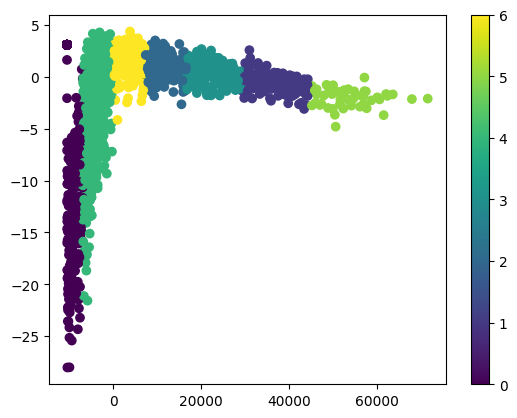

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index i Calinski-Harabasz Score
calinski_harabasz_sc = calinski_harabasz_score(x_train_encoded, labels)
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_sc}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.6987962126731873
Calinski-Harabasz Score: 25709.251150110067
Davies-Bouldin Index: 0.48271542807767337


Sieć neuronowa (autoencoder) przy użyciu paczki tensorflow. Jak widać otrzymane wyniki są również bardzo dobre.

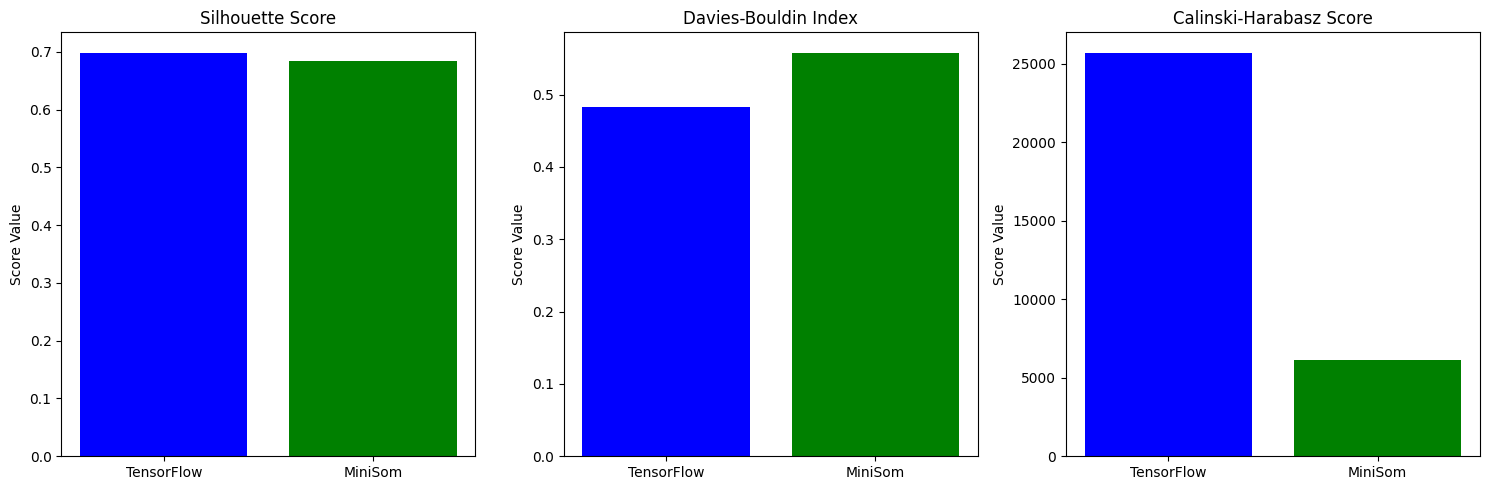

In [69]:
tf_scores = [s_score, db_score, calinski_harabasz_sc]
minisom_scores = [sil_score, davies_score, calinski_score]

# Metric names
metric_names = ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score']

# Create bar plots
plt.figure(figsize=(15, 5))

# Bar plot for Silhouette Score
plt.subplot(1, 3, 1)
plt.bar(['TensorFlow', 'MiniSom'], [tf_scores[0], minisom_scores[0]], color=['blue', 'green'])
plt.title('Silhouette Score')
plt.ylabel('Score Value')

# Bar plot for Davies-Bouldin Index
plt.subplot(1, 3, 2)
plt.bar(['TensorFlow', 'MiniSom'], [tf_scores[1], minisom_scores[1]], color=['blue', 'green'])
plt.title('Davies-Bouldin Index')
plt.ylabel('Score Value')

# Bar plot for Calinski-Harabasz Score
plt.subplot(1, 3, 3)
plt.bar(['TensorFlow', 'MiniSom'], [tf_scores[2], minisom_scores[2]], color=['blue', 'green'])
plt.title('Calinski-Harabasz Score')
plt.ylabel('Score Value')

plt.tight_layout()
plt.show()

### Modele biznesowe

Poniżej przedstawimy funkcję, które spełniają założenia naszych modeli bizensowych.

### Model biznesowy 1 - propozycje filmów do obejrzenia

In [36]:
title = df['movie_title'].to_frame()

In [37]:
df1 = df1.join(title)

In [38]:
df1.columns

Index(['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'age', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western', 'cluster', 'movie_title'],
      dtype='object')

In [39]:
from scipy.spatial.distance import euclidean


In [40]:
import tkinter as tk
from tkinter import messagebox

def recommend_similar_movies(movie_title, n_recommendations=5):
    # Get the data for the given movie
    movie_data = df1[df1["movie_title"] == movie_title]
    
    if movie_data.empty:
        return []

    # Get the feature vector of the given movie
    movie_vector = movie_data.drop(['movie_title', 'cluster'], axis=1).values[0]
    
    # Get the cluster number of the given movie
    movie_cluster = movie_data["cluster"].values[0]
    
    # Get the movies in the same cluster excluding the given movie
    similar_movies = df1[(df1["cluster"] == movie_cluster) & (df1["movie_title"] != movie_title)]
    
    # Calculate the distances to the given movie
    similar_movies['distance'] = similar_movies.drop(['movie_title', 'cluster'], axis=1).apply(lambda x: euclidean(x, movie_vector), axis=1)
    
    # Sort the movies by distance and get the top n recommendations
    closest_movies = similar_movies.sort_values(by='distance').head(n_recommendations)
    
    return closest_movies['movie_title'].tolist()
def search_data(movie_list:list):
    info = []
    for movie in movie_list:
        matched = df[df['movie_title'] == movie]
        matched = matched[['movie_title', 'production_date', 'genres', 'runtime_minutes','director_name','movie_averageRating', 'movie_numerOfVotes',
       'approval_Index',]]
        if not matched.empty:
            inf = matched.iloc[0]
            formatted_info = "{} | Date: {} | Genres: {} | Runtime: {} | Director: {} | Rating: {} | Votes: {} | Approval: {}".format(
                inf['movie_title'], inf['production_date'], inf['genres'], inf['runtime_minutes'], inf['director_name'], 
                inf['movie_averageRating'], inf['movie_numerOfVotes'], inf['approval_Index'])
            info.append(formatted_info)
    return info
# Funkcja wyszukiwania filmów
def search_movies(event=None):
    search_text = entry.get().lower()
    matched_movies = df[df['movie_title'].str.lower().str.contains(search_text)]
    listbox.delete(0, tk.END)
    for title in matched_movies['movie_title']:
        listbox.insert(tk.END, title)
def on_select(event):
    selected_movie = listbox.get(listbox.curselection())
    searched = recommend_similar_movies(selected_movie)
    recommendations = '\n'.join(search_data(searched))  # Łączenie rekomendacji w jednym łańcuchu
    recommendations_var.set("Recommended movies:\n" + recommendations )
# Tworzenie głównego okna aplikacji
root = tk.Tk()

root.title("Movie Recommender")

# Tworzenie etykiety
label = tk.Label(root, text="Enter movie name:")
label.pack(pady=10)

# Tworzenie pola tekstowego
entry = tk.Entry(root, width=40)
entry.pack(pady=10)
entry.bind('<KeyRelease>', search_movies)

# Tworzenie listboxa do wyświetlania wyników wyszukiwania
listbox = tk.Listbox(root, width=50, height=10)
listbox.pack(pady=10)
listbox.bind('<<ListboxSelect>>', on_select)

# Tworzenie etykiety do wyświetlania rekomendacji
recommendations_var = tk.StringVar()
recommendations_label = tk.Label(root, textvariable=recommendations_var, justify=tk.LEFT, anchor="w", width=150)
recommendations_label.pack(pady=10)

# Uruchomienie głównej pętli Tkinter
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Darek\anaconda3\envs\kiddo\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Darek\AppData\Local\Temp\ipykernel_6820\2823395301.py", line 48, in on_select
    selected_movie = listbox.get(listbox.curselection())
  File "c:\Users\Darek\anaconda3\envs\kiddo\lib\tkinter\__init__.py", line 3226, in get
    return self.tk.call(self._w, 'get', first)
_tkinter.TclError: bad listbox index "": must be active, anchor, end, @x,y, or a number


Funkcja wraz z gui, która poleca nam jaki film obejrzeć, po obejrzeniu filmu podanego w polu do wpisania.

### Model biznesowy 2 - propozycje jakie filmy najlepiej się sprzedają dla producentów filmowych

In [41]:
features = ['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $']

In [42]:
df4 = df4.join(title)

In [43]:
def recommend_movies_to_make():
    # Klasteryzacja filmów
    df4["cluster"] = kmeans.fit_predict(df4[features])
    
    # Obliczanie średniego zysku i oceny dla każdego klastra
    cluster_means = df4.groupby('cluster').agg({'Worldwide gross $': 'max', 'movie_averageRating': 'max', 'movie_numerOfVotes' : 'max', 'approval_Index' : 'max'})
    
    # Znajdowanie klastra z największym średnim zyskiem i oceną
    best_cluster = cluster_means.sort_values(by=['Worldwide gross $', 'movie_averageRating'], ascending=False).index[0]
    
    # Znajdowanie filmów w najlepszym klastrze
    best_movies = df4[(df4["cluster"] == best_cluster)]
    
    # Dodawanie informacji o gatunku, czasie trwania i dacie do wyników
    recommended_movies_info = df[['movie_title', 'genres', 'runtime_minutes', 'production_date']].merge(best_movies['movie_title'], on='movie_title')
    
    # Dodawanie średnich wartości zysku, oceny, liczby głosów i indeksu akceptacji dla klastra
    cluster_info = cluster_means.loc[best_cluster]
    
    return recommended_movies_info, cluster_info

In [44]:
def analyze_movies(movies):
    # Najczęściej występujący gatunek
    genres = movies['genres'].str.split(',', expand=True).stack()
    most_common_genre = genres.value_counts().idxmax()

    # Średnia długość trwania filmu
    average_runtime = movies['runtime_minutes'].mean()

    # Najczęściej występujący miesiąc
    movies['production_date'] = pd.to_datetime(movies['production_date'])
    most_common_month = movies['production_date'].dt.month.value_counts().idxmax()

    return most_common_genre, average_runtime, most_common_month

movies, cluster_info = recommend_movies_to_make()
most_common_genre, average_runtime, most_common_month = analyze_movies(movies)

print(f"Most common genre: {most_common_genre}")
print(f"Average runtime: {average_runtime}")
print(f"Most common month: {most_common_month}")

Most common genre: Drama
Average runtime: 115.15412186379929
Most common month: 12


Najlepiej tworzyć się filmy z gatunku Drama, o średnim czasie trwania 110 minut oraz najelpszy miesiąc na wydanie takiego filmu to październik.